# Tutorial for gwaslab

- In this tutorial, we will provide a brief overview of the core functions in GWASLab for summary statistics quality control (QC), standardization, and harmonization.
- We will also demonstrate visualization features, including Manhattan plots, Q–Q plots, and regional plots.
- The Jupyter notebook for this tutorial can be downloaded from https://github.com/Cloufield/gwaslab/blob/main/docs/tutorial_3.6.ipynb
- Please note that the sample data and reference files are available on GitHub, while the full processed reference datasets are currently hosted on Dropbox.


## Download sample data

- Using a jupyter notebook, we first download a sample dataset.
- The sample dataset we will use as an example (File size: 40M)
  1. sample sumstats `bbj_t2d_hm3_chr7_variants.txt.gz` processed sumstats (only hapmap3 variants and chr7 region) of type 2 diabetes from BBJ (K. Suzuki et al., Nature Genetics. 51, 379–386 (2019).)
  2. SNPID-rsID conversion table (sample) `1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz`
  3. dbSNP vcf (sample) `b157_2564.vcf.gz`
  4. 1KG EAS reference VCF (only chr7:126253550-128253550) `1kg_eas_hg19.chr7_126253550_128253550.vcf.gz`
    

In [1]:
!wget https://raw.githubusercontent.com/cloufield/gwaslab/main/examples/1_main_tutorial/sample_data.tar.gz
!tar -xvzf sample_data.tar.gz

--2025-10-19 20:56:16--  https://raw.githubusercontent.com/cloufield/gwaslab/main/examples/1_main_tutorial/sample_data.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41498334 (40M) [application/octet-stream]
Saving to: ‘sample_data.tar.gz’

sample_data.tar.gz  100%[===================>]  39.58M  8.96MB/s    in 4.5s    

2025-10-19 20:56:20 (8.78 MB/s) - ‘sample_data.tar.gz’ saved [41498334/41498334]

./sample_data/
./sample_data/bbj_t2d_hm3_chr7_variants.txt.gz
./sample_data/1kg_eas_hg19.chr7_126253550_128253550.vcf.gz
./sample_data/b157_2564.vcf.gz
./sample_data/1kg_eas_hg19.chr7_126253550_128253550.vcf.gz.tbi
./sample_data/1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz
./sample_data/b157_2564.vcf.gz.tbi


## Import gwaslab package

gwaslab can be installed using pip 

In [2]:
# !pip install gwaslab==3.6.9

If you installed gwaslab from pip, simply run the command to import the package:

In [3]:
import gwaslab as gl

Or if you want to use the latest version from github (beta version), you can clone the repository and import the package by inserting your package path into the system path like:

In [4]:
#!git clone https://github.com/Cloufield/gwaslab.git

import sys
sys.path.insert(0,"/home/yunye/work/gwaslab/src")
import gwaslab as gl

## Loading data into gwaslab Sumstats

Let's import the raw sumstats into the `gwaslab.Sumstats` Object by specifying the necessary columns.

In [5]:
mysumstats = gl.Sumstats("./sample_data/bbj_t2d_hm3_chr7_variants.txt.gz",
             snpid="SNPID",
             chrom="CHR",
             pos="POS",
             ea="EA",
             nea="NEA",
             neaf="EAF",
             beta="BETA",
             se="SE",
             p="P",
             n="N",
             sep="\t")

2025/10/19 20:56:22 GWASLab v3.6.9 https://cloufield.github.io/gwaslab/
2025/10/19 20:56:22 (C) 2022-2025, Yunye He, Kamatani Lab, GPL-3.0 license, gwaslab@gmail.com
2025/10/19 20:56:22 Python version: 3.12.0 | packaged by conda-forge | (main, Oct  3 2023, 08:43:22) [GCC 12.3.0]
2025/10/19 20:56:22 Start to initialize gl.Sumstats from file :./sample_data/bbj_t2d_hm3_chr7_variants.txt.gz
2025/10/19 20:56:24  -Reading columns          : BETA,SE,NEA,SNPID,EAF,EA,P,N,POS,CHR
2025/10/19 20:56:24  -Renaming columns to      : BETA,SE,NEA,SNPID,EAF,EA,P,N,POS,CHR
2025/10/19 20:56:24  -Current Dataframe shape : 1103020  x  10
2025/10/19 20:56:24  -Initiating a status column: STATUS ...
2025/10/19 20:56:24  #WARNING! Version of genomic coordinates is unknown...
2025/10/19 20:56:24  -NEAF is specified...
2025/10/19 20:56:24  -Checking if 0<= NEAF <=1 ...
2025/10/19 20:56:24  -Converted NEAF to EAF.
2025/10/19 20:56:24  -Removed 0 variants with bad NEAF.
2025/10/19 20:56:24 Start to reorder the co

## Loading by specfying keyword in formatbook

Or you can simply specify format keywords listed in formatbook (https://github.com/Cloufield/formatbook)  

In [6]:
# mysumstats = gl.Sumstats("./sample_data/bbj_t2d_hm3_chr7_variants.txt.gz", fmt="gwaslab", verbose=True)

## Sumstats.data

Sumstats are stored in `Sumstats.data` as a pandas.DataFrame, you can check the data like: 

In [7]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
0,1:752566_G_A,1,752566,G,A,0.8422,-0.0155,0.0131,0.2350,166718,9999999
1,1:752721_A_G,1,752721,G,A,0.2507,0.0204,0.0147,0.1650,166718,9999999
2,1:754182_A_G,1,754182,G,A,0.2505,0.0222,0.0166,0.1817,166718,9999999
3,1:760912_C_T,1,760912,C,T,0.8425,-0.0171,0.0148,0.2480,166718,9999999
4,1:761147_T_C,1,761147,C,T,0.1581,0.0171,0.0148,0.2480,166718,9999999
...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,X,154343911,G,A,0.8058,0.0019,0.0090,0.8297,191764,9999999
1103016,X:154379088_C_A,X,154379088,C,A,0.7783,0.0027,0.0094,0.7723,191764,9999999
1103017,X:154536836_C_T,X,154536836,C,T,0.2196,-0.0084,0.0085,0.3192,191764,9999999
1103018,X:154763036_A_G,X,154763036,G,A,0.3686,-0.0102,0.0105,0.3302,191764,9999999


- For details on gwaslab Sumstats Object, see: https://cloufield.github.io/gwaslab/SumstatsObject/

## Infer genome build

If the build is not specified, gwaslab can infer it based on HapMap3 SNPs. For more details, see: https://cloufield.github.io/gwaslab/InferBuild/

In [8]:
mysumstats.infer_build()

2025/10/19 20:56:25 Start to infer genome build version using hapmap3 SNPs...v3.6.9
2025/10/19 20:56:25  -Current Dataframe shape : 1103020 x 11 ; Memory usage: 105.34 MB
2025/10/19 20:56:25 Start to infer genome build version using hapmap3 SNPs...
2025/10/19 20:56:25  -Loading Hapmap3 variants data...
2025/10/19 20:56:26  -CHR:POS will be used for matching...
2025/10/19 20:56:28  -Matching variants for hg19: num_hg19 =  1093200
2025/10/19 20:56:28  -Matching variants for hg38: num_hg38 =  10807
2025/10/19 20:56:28  -Since num_hg19 >> num_hg38, assigning genome build hg19...
2025/10/19 20:56:29 Finished inferring genome build version using hapmap3 SNPs.


## Create Manhattan plots and Q-Q plots

The first thing you’ll probably want to check is the Manhattan and Q–Q plots for your summary statistics.
gwaslab performs a minimal QC on the data automatically when generating these plots.

2025/10/19 20:56:29 Start to create MQQ plot...v3.6.9:
2025/10/19 20:56:29  -Genomic coordinates version: 19...
2025/10/19 20:56:29  -Genome-wide significance level to plot is set to 5e-08 ...
2025/10/19 20:56:29  -Raw input contains 1103020 variants...
2025/10/19 20:56:29  -MQQ plot layout mode is : mqq
2025/10/19 20:56:29 Finished loading specified columns from the sumstats.
2025/10/19 20:56:29 Start data conversion and sanity check:
2025/10/19 20:56:29  -Removed 0 variants with nan in CHR or POS column ...
2025/10/19 20:56:30  -Removed 0 variants with CHR <=0...
2025/10/19 20:56:30  -Removed 0 variants with nan in P column ...
2025/10/19 20:56:30  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/10/19 20:56:30  -Sumstats P values are being converted to -log10(P)...
2025/10/19 20:56:30  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/10/19 20:56:30  -Converting data above cut line...
2025/10/19 20:56:30  -Maximum -log10(P)

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7fed335eb950>)

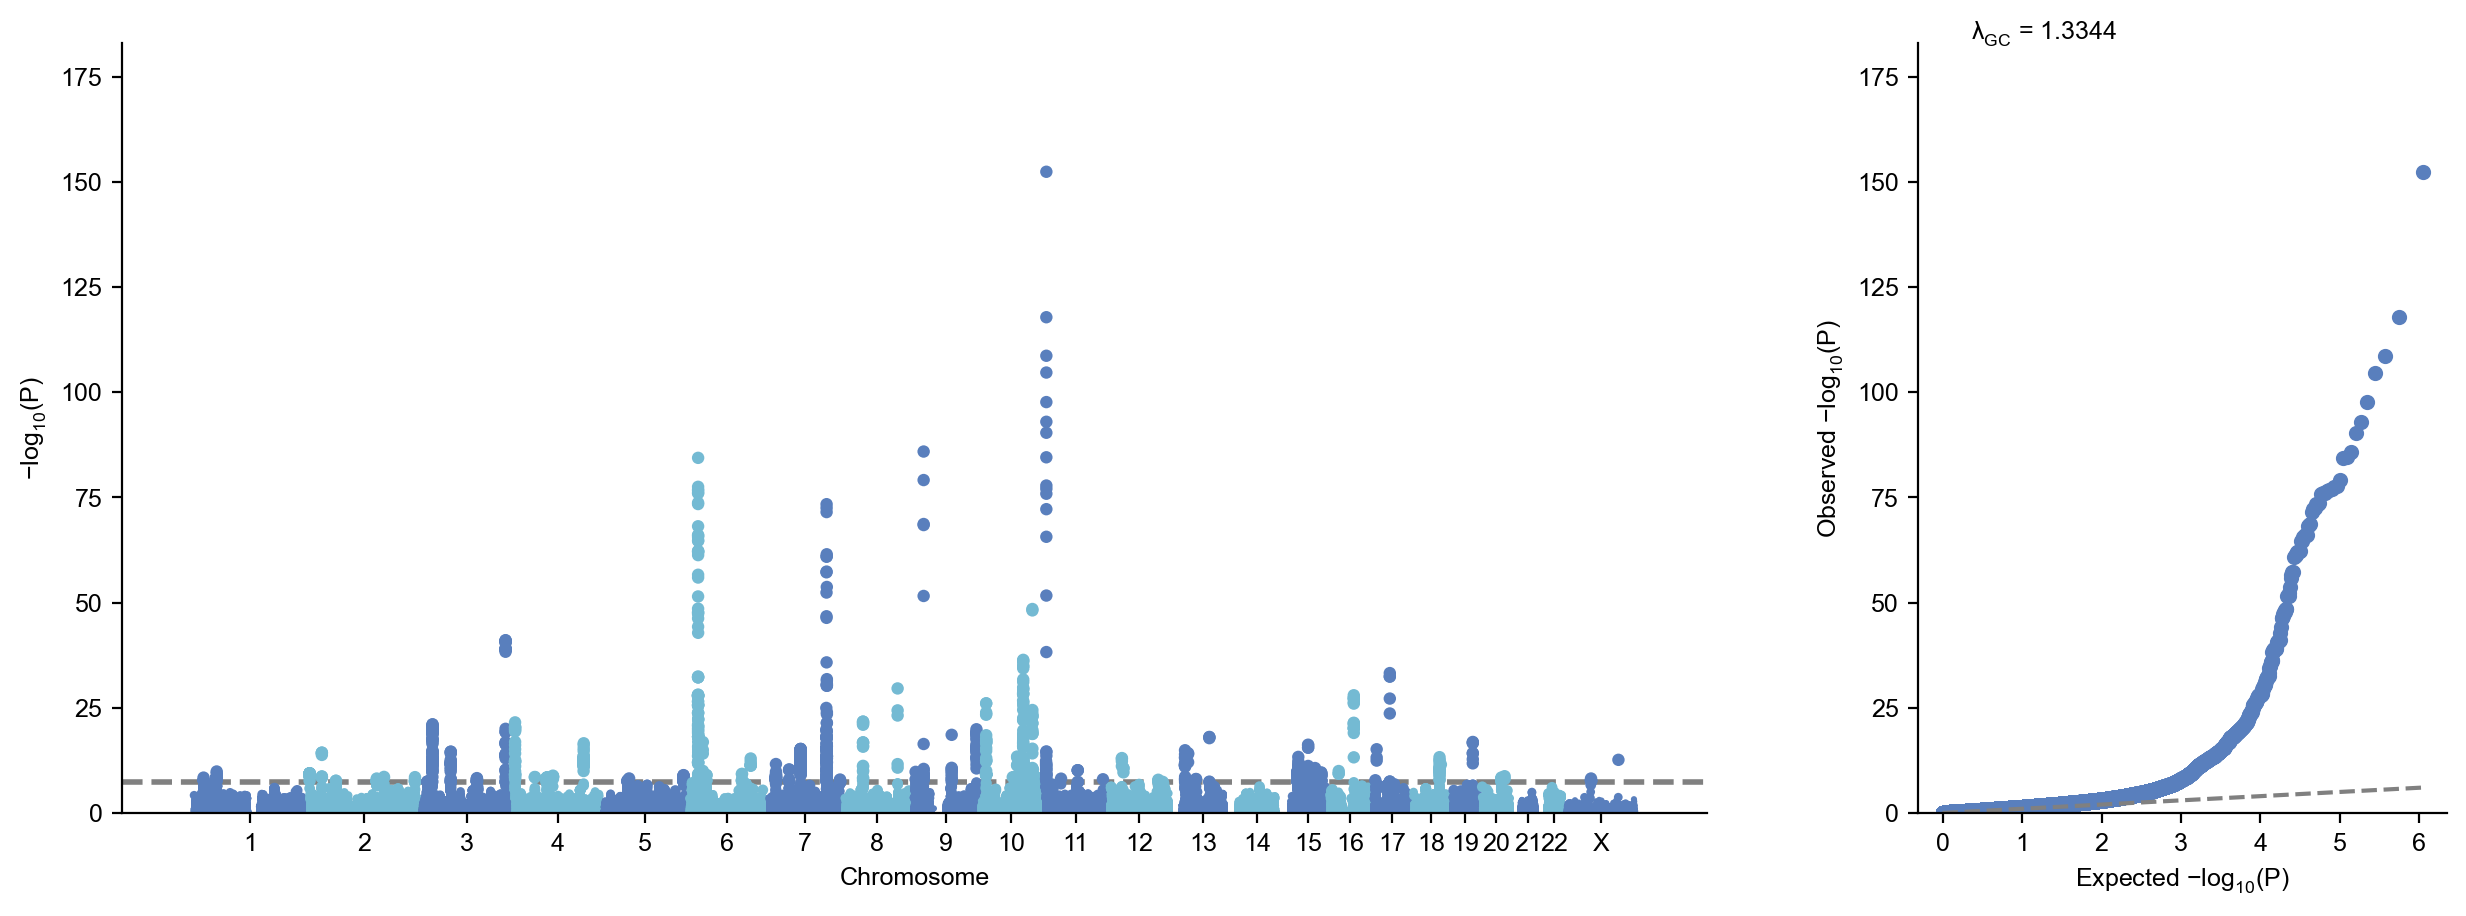

In [9]:
mysumstats.plot_mqq()

Using `.plot_mqq()`, you can easily plot the Manhattan and QQ plot, but the plots without any manipulations are not really informative in this case, and plotting all points takes a relatively long time. The most significant locus dwarfed other less signicant loci. To adjust the plot, gwaslab provides a wide range of options for customization. For example, we can use `skip` and `cut` :

- skip : skip variants with MLOG10P < `skip` for faster plotting speed
- cut : rescale the MLOG10P values when MLOG10P > `cut`  

2025/10/19 20:56:46 Start to create MQQ plot...v3.6.9:
2025/10/19 20:56:46  -Genomic coordinates version: 19...
2025/10/19 20:56:46  -Genome-wide significance level to plot is set to 5e-08 ...
2025/10/19 20:56:46  -Raw input contains 1103020 variants...
2025/10/19 20:56:46  -MQQ plot layout mode is : mqq
2025/10/19 20:56:46 Finished loading specified columns from the sumstats.
2025/10/19 20:56:46 Start data conversion and sanity check:
2025/10/19 20:56:46  -Removed 0 variants with nan in CHR or POS column ...
2025/10/19 20:56:46  -Removed 0 variants with CHR <=0...
2025/10/19 20:56:46  -Removed 0 variants with nan in P column ...
2025/10/19 20:56:46  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/10/19 20:56:46  -Sumstats P values are being converted to -log10(P)...
2025/10/19 20:56:46  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/10/19 20:56:47  -Converting data above cut line...
2025/10/19 20:56:47  -Maximum -log10(P)

(<Figure size 3000x1000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7fed335eb950>)

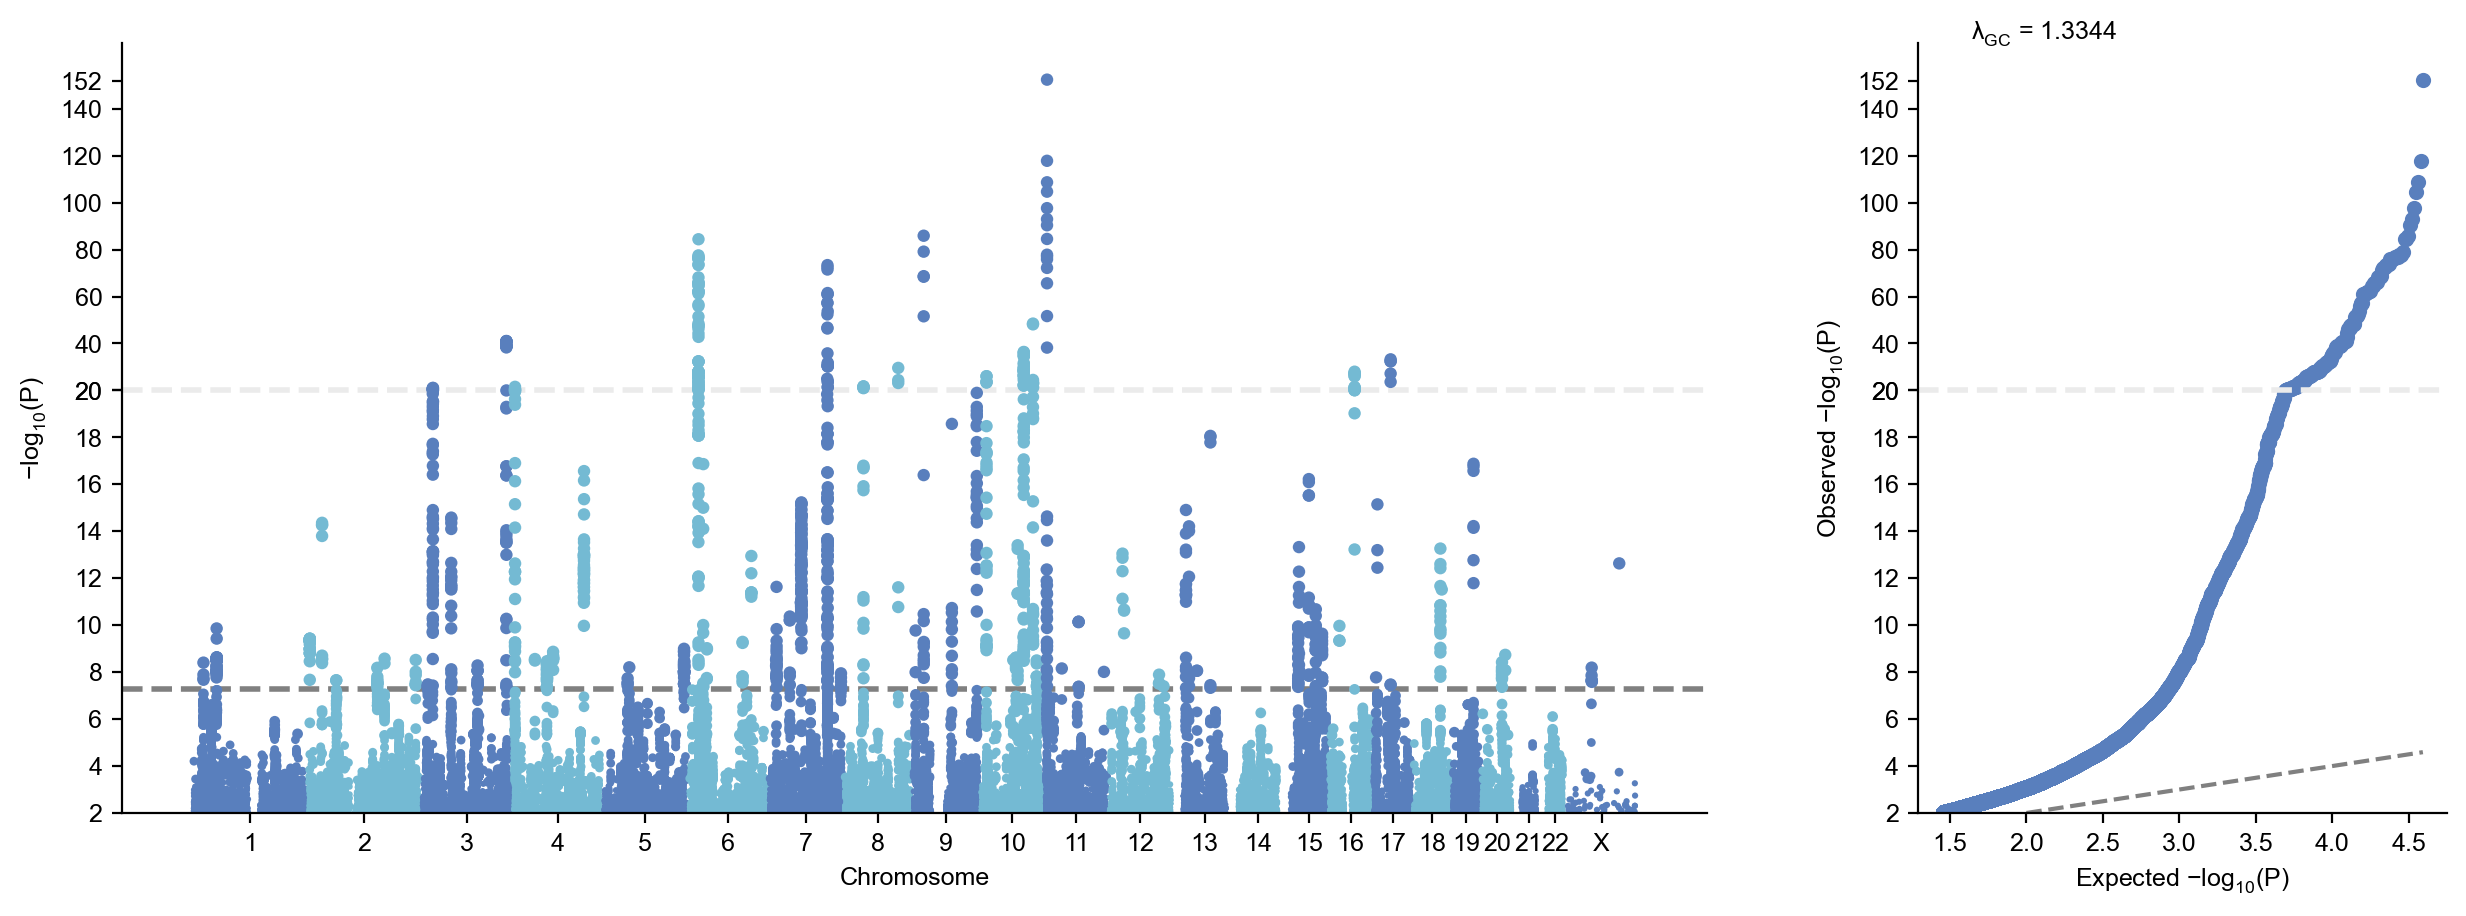

In [10]:
mysumstats.plot_mqq(skip=2, cut=20)

Looks better now. But what if we want to annotate some of the most significant loci (for example, lead variants with MLOG10P>30) and only plot Manhattan plot?

2025/10/19 20:56:48 Start to create MQQ plot...v3.6.9:
2025/10/19 20:56:48  -Genomic coordinates version: 19...
2025/10/19 20:56:48  -Genome-wide significance level to plot is set to 5e-08 ...
2025/10/19 20:56:48  -Raw input contains 1103020 variants...
2025/10/19 20:56:48  -MQQ plot layout mode is : m
2025/10/19 20:56:48 Finished loading specified columns from the sumstats.
2025/10/19 20:56:48 Start data conversion and sanity check:
2025/10/19 20:56:48  -Removed 0 variants with nan in CHR or POS column ...
2025/10/19 20:56:48  -Removed 0 variants with CHR <=0...
2025/10/19 20:56:48  -Removed 0 variants with nan in P column ...
2025/10/19 20:56:48  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/10/19 20:56:48  -Sumstats P values are being converted to -log10(P)...
2025/10/19 20:56:49  -Sanity check: 0 na/inf/-inf variants will be removed...
2025/10/19 20:56:49  -Converting data above cut line...
2025/10/19 20:56:49  -Maximum -log10(P) v

(<Figure size 3000x1000 with 1 Axes>, <gwaslab.g_Log.Log at 0x7fed335eb950>)

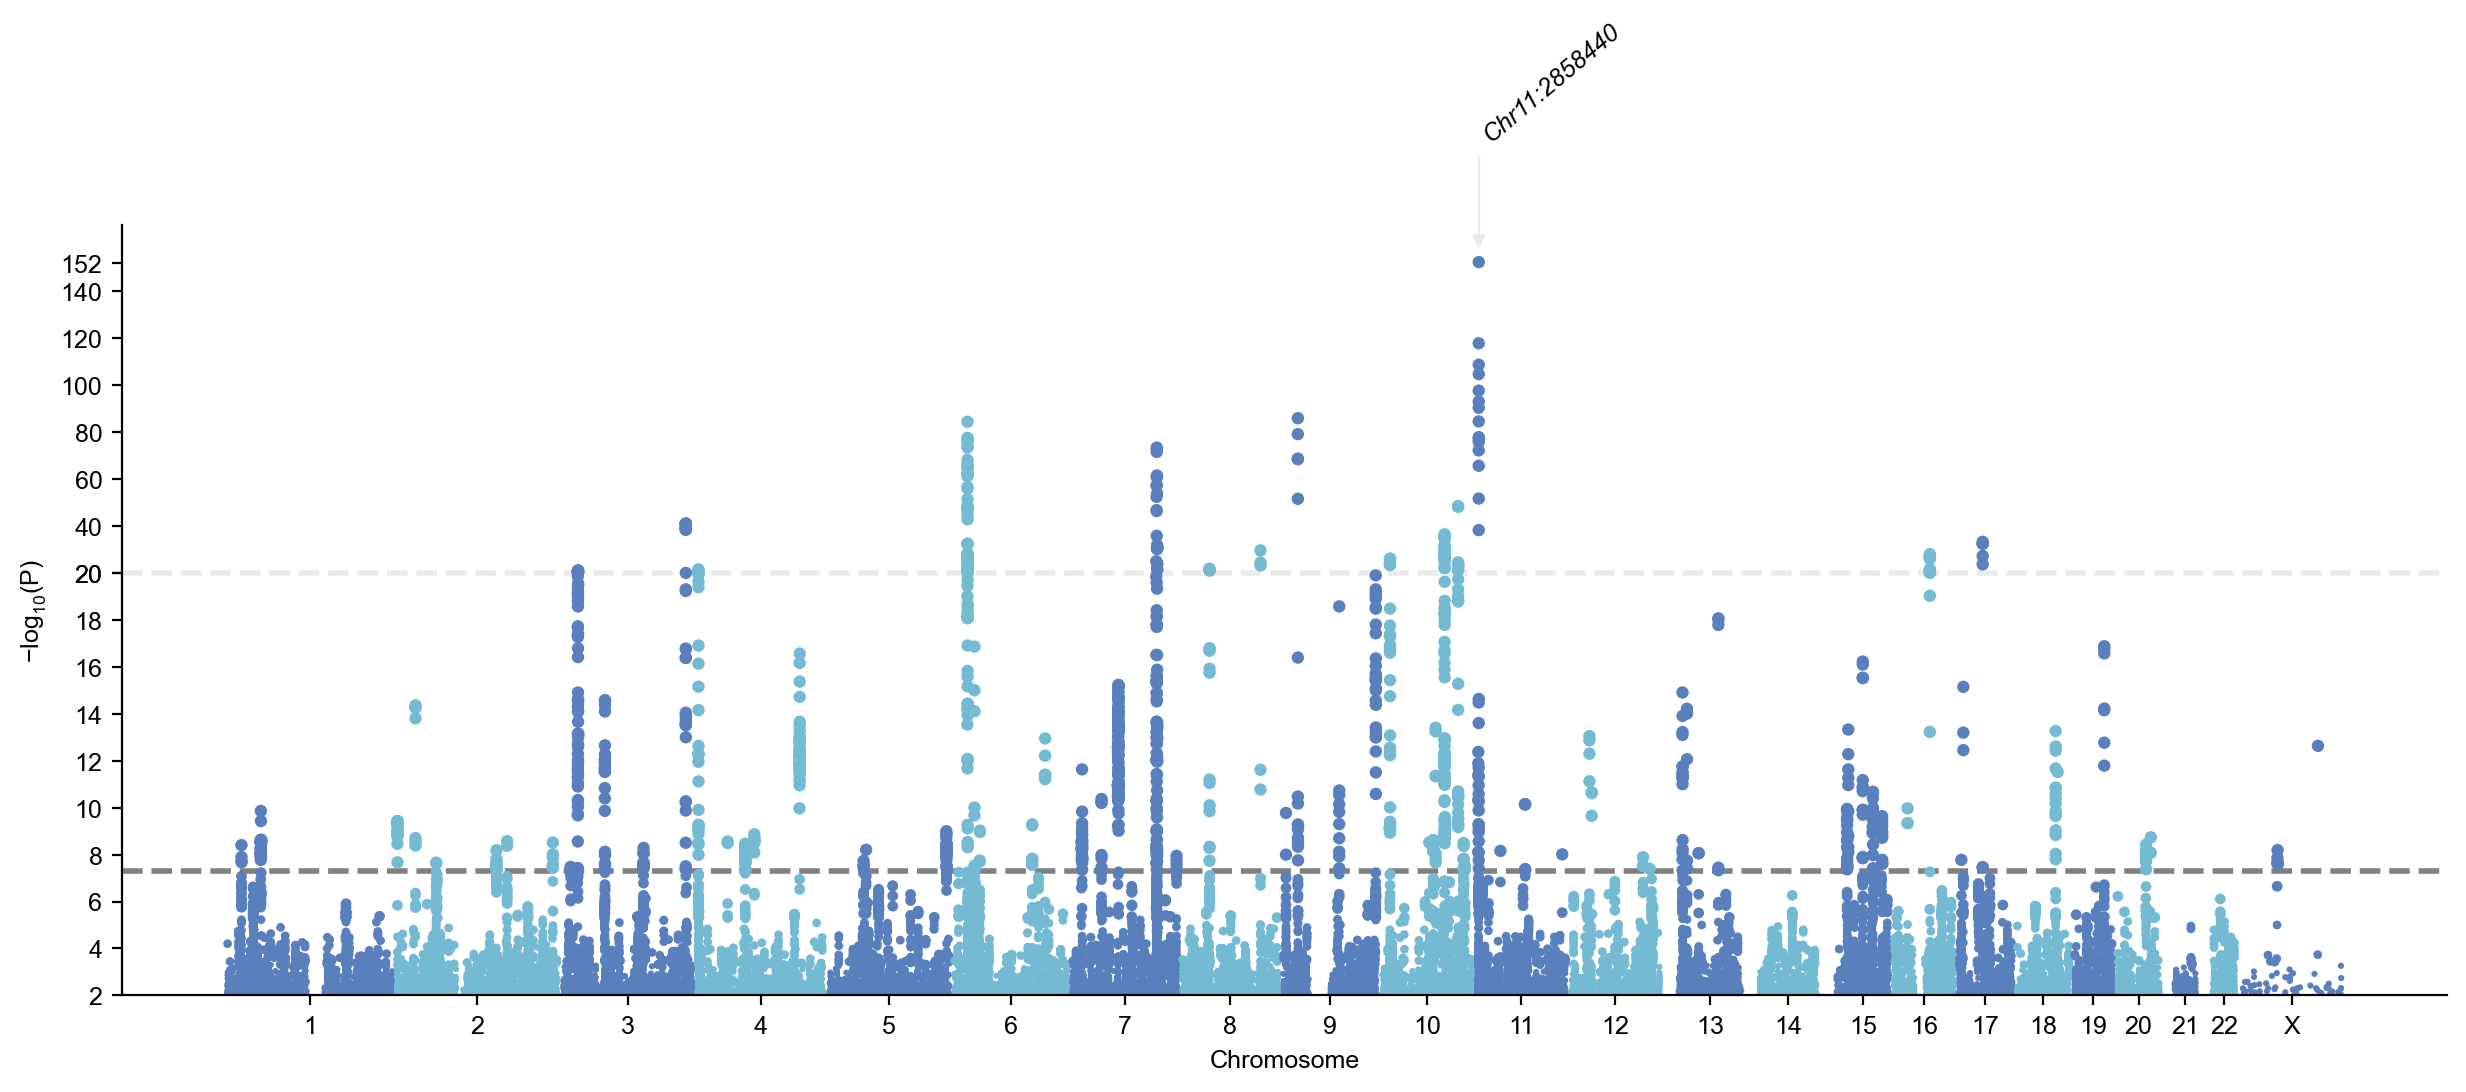

In [11]:
mysumstats.plot_mqq(skip=2, cut=20, mode="m", anno=True, sig_level_lead=1e-30)

gwaslab supports a wide range of customizable options. For details on other options for Manhattan and Q-Q plots, see: https://cloufield.github.io/gwaslab/Visualization/

## Standardization & QC : `.basic_check()`

It is needed to check variant ID (SNPID), rsID, chromosome(CHR), basepair position(POS), alleles (EA and NEA) and statistics first before any manipulations or analysis. gwaslab provides a all-in-one function for this, `.basic_check()`.

Note: Sometimes you need do this before plotting if the sumstats are not in a standard format.

In [12]:
#check SNPID,rsID,CHR,POS,EA, NEA and statistics
mysumstats.basic_check()

2025/10/19 20:56:50 Start to check SNPID/rsID...v3.6.9
2025/10/19 20:56:50  -Current Dataframe shape : 1103020 x 11 ; Memory usage: 105.34 MB
2025/10/19 20:56:50  -Checking SNPID data type...
2025/10/19 20:56:50  -Converting SNPID to pd.string data type...
2025/10/19 20:56:50  -Checking NA strings :na,NA,Na,Nan,NaN,<NA>,null,NULL,#N/A,#VALUE!,N/A,n/a,missing,
2025/10/19 20:56:50  -Checking if SNPID contains NA strings...
2025/10/19 20:56:50  -Checking if SNPID is CHR:POS:NEA:EA...(separator: - ,: , _)
2025/10/19 20:56:52 Finished checking SNPID/rsID.
2025/10/19 20:56:52 Start to fix chromosome notation (CHR)...v3.6.9
2025/10/19 20:56:52  -Current Dataframe shape : 1103020 x 11 ; Memory usage: 105.34 MB
2025/10/19 20:56:52  -Checking CHR data type...
2025/10/19 20:56:52  -Variants with standardized chromosome notation: 1100517
2025/10/19 20:56:52  -Variants with fixable chromosome notations: 2503
2025/10/19 20:56:52  -No unrecognized chromosome notations...
2025/10/19 20:56:52  -Identif

In [13]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
0,1:752566_G_A,1,752566,G,A,0.8422,-0.0155,0.0131,0.2350,166718,1960099
1,1:752721_A_G,1,752721,G,A,0.2507,0.0204,0.0147,0.1650,166718,1960099
2,1:754182_A_G,1,754182,G,A,0.2505,0.0222,0.0166,0.1817,166718,1960099
3,1:760912_C_T,1,760912,C,T,0.8425,-0.0171,0.0148,0.2480,166718,1960099
4,1:761147_T_C,1,761147,C,T,0.1581,0.0171,0.0148,0.2480,166718,1960099
...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911_A_G,23,154343911,G,A,0.8058,0.0019,0.0090,0.8297,191764,1960099
1103016,X:154379088_C_A,23,154379088,C,A,0.7783,0.0027,0.0094,0.7723,191764,1960099
1103017,X:154536836_C_T,23,154536836,C,T,0.2196,-0.0084,0.0085,0.3192,191764,1960099
1103018,X:154763036_A_G,23,154763036,G,A,0.3686,-0.0102,0.0105,0.3302,191764,1960099


By checking the log, we can see that the sumstats look good. But we still found several variants that were not normalized. gwaslab fixed the position and alleles for the un-normalizated indels. And gwaslab standardize the notation for chromosome X to 23.

In fact, `.basic_check()` is a wrapper of the following basic functions, you can also use these separately.

- mysumstats.fix_ID()
- mysumstats.fix_chr()
- mysumstats.fix_pos()
- mysumstats.fix_allele()
- mysumstats.check_sanity()
- mysumstats.check_data_consistency()
- mysumstats.normalize_allele()
- mysumstats.remove_dup()

For other options, see: https://cloufield.github.io/gwaslab/Standardization/

## Extract lead variants : get_lead()

Let's extract the lead variants in each significant loci to check our data.

The significant loci are detected based on a sliding window (default window size: `windowsizekb=500` kb)

By specifying `anno=True` , gwaslab will also annotate the lead variant with its nearest gene names and distance.

**Note**: If you did not specify build when loading the summary statistics or have not run .infer_build(), you need to explicitly set build="19" (GRCh37/hg19) or build="38" (GRCh38/hg38) here for annotation.

**Note**: GWASLab will donwload reference files when you run it for the first time. In this case, `ensembl_hg19_gtf_protein_coding` was downloaded and processed automatically.

In [14]:
mysumstats.get_lead(anno=True)

2025/10/19 20:57:05 Start to extract lead variants...v3.6.9
2025/10/19 20:57:05  -Current Dataframe shape : 1103020 x 11 ; Memory usage: 96.94 MB
2025/10/19 20:57:05  -Processing 1103020 variants...
2025/10/19 20:57:05  -Significance threshold : 5e-08
2025/10/19 20:57:05  -Sliding window size: 500  kb
2025/10/19 20:57:05  -Using P for extracting lead variants...
2025/10/19 20:57:05  -Found 1271 significant variants in total...
2025/10/19 20:57:06  -Identified 75 lead variants!
2025/10/19 20:57:06  -Annotating variants using references:ensembl
2025/10/19 20:57:06  -Annotating variants using references based on genome build:19
2025/10/19 20:57:06 Start to annotate variants with nearest gene name(s)...
2025/10/19 20:57:06  -Assigning Gene name using ensembl_hg19_gtf for protein coding genes
2025/10/19 20:57:08 Finished annotating variants with nearest gene name(s) successfully!
2025/10/19 20:57:08 Finished extracting lead variants.


,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS,LOCATION,GENE
8927,1:22046558_A_C,1,22046558,C,A,0.2527,0.0607,0.0103,3.941000e-09,191764,1960099,0,USP48
19220,1:51174330_C_T,1,51174330,C,T,0.7902,0.0723,0.0113,1.380000e-10,191764,1960099,0,FAF1
90573,2:637597_C_T,2,637597,C,T,0.9017,0.0938,0.0150,3.725000e-10,191764,1960099,29738,TMEM18
102403,2:27742603_T_C,2,27742603,C,T,0.5613,-0.0690,0.0088,4.358000e-15,191764,1960099,0,GCKR
117019,2:58959112_G_A,2,58959112,G,A,0.1754,0.0654,0.0117,2.237000e-08,191764,1960099,-490605,FANCL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035288,19:46158643_G_T,19,46158643,G,T,0.6372,0.0805,0.0094,1.332000e-17,191764,1960099,-9756,EML2
1059172,20:42989777_G_A,20,42989777,G,A,0.4503,0.0518,0.0088,3.770000e-09,191764,1960099,0,HNF4A
1062583,20:50155386_T_C,20,50155386,C,T,0.4266,0.0538,0.0090,1.836000e-09,191764,1960099,0,NFATC2
1101431,X:57150010_C_T,23,57150010,C,T,0.3012,0.0443,0.0076,6.427000e-09,191764,1960099,-2030,SPIN2B


We extracted a total of 75 lead variants with a sliding window size of 500kb from this processed dataset.

For other options, see: https://cloufield.github.io/gwaslab/ExtractLead/

## Use the SNPID to create some highly customized mqq plot

GWASLab can create much more complicated Manhattan plots.

For example, 
- annotate the lead variants with closest gene names (threshold for annotation p<1e-20)
- annotate selected variants with user-provided texts 
- pinpoint some variants
- highlight some loci
- MAF-stratified Q-Q plot
- save as my_first_mqq_plot.png with {"dpi":400,"facecolor":"white"}

2025/10/19 20:57:08 Start to create MQQ plot...v3.6.9:
2025/10/19 20:57:08  -Genomic coordinates version: 19...
2025/10/19 20:57:08  -Genome-wide significance level to plot is set to 5e-08 ...
2025/10/19 20:57:08  -Raw input contains 1103020 variants...
2025/10/19 20:57:08  -MQQ plot layout mode is : mqq
2025/10/19 20:57:08  -Loci to highlight (#CB132D): 7:127253550_C_T,11:2858440_G_A
2025/10/19 20:57:08   -highlight_windowkb is set to:  1000  kb
2025/10/19 20:57:08  -Variants to pinpoint (green) : 9:22134094_T_C,6:20686996_C_A
2025/10/19 20:57:09 Finished loading specified columns from the sumstats.
2025/10/19 20:57:09 Start data conversion and sanity check:
2025/10/19 20:57:09  -Removed 0 variants with nan in CHR or POS column ...
2025/10/19 20:57:09  -Removed 0 variants with CHR <=0...
2025/10/19 20:57:09  -Removed 0 variants with nan in EAF column ...
2025/10/19 20:57:09  -Removed 0 variants with nan in P column ...
2025/10/19 20:57:09  -Sanity check after conversion: 0 variants wi

(<Figure size 6000x2000 with 2 Axes>, <gwaslab.g_Log.Log at 0x7fed335eb950>)

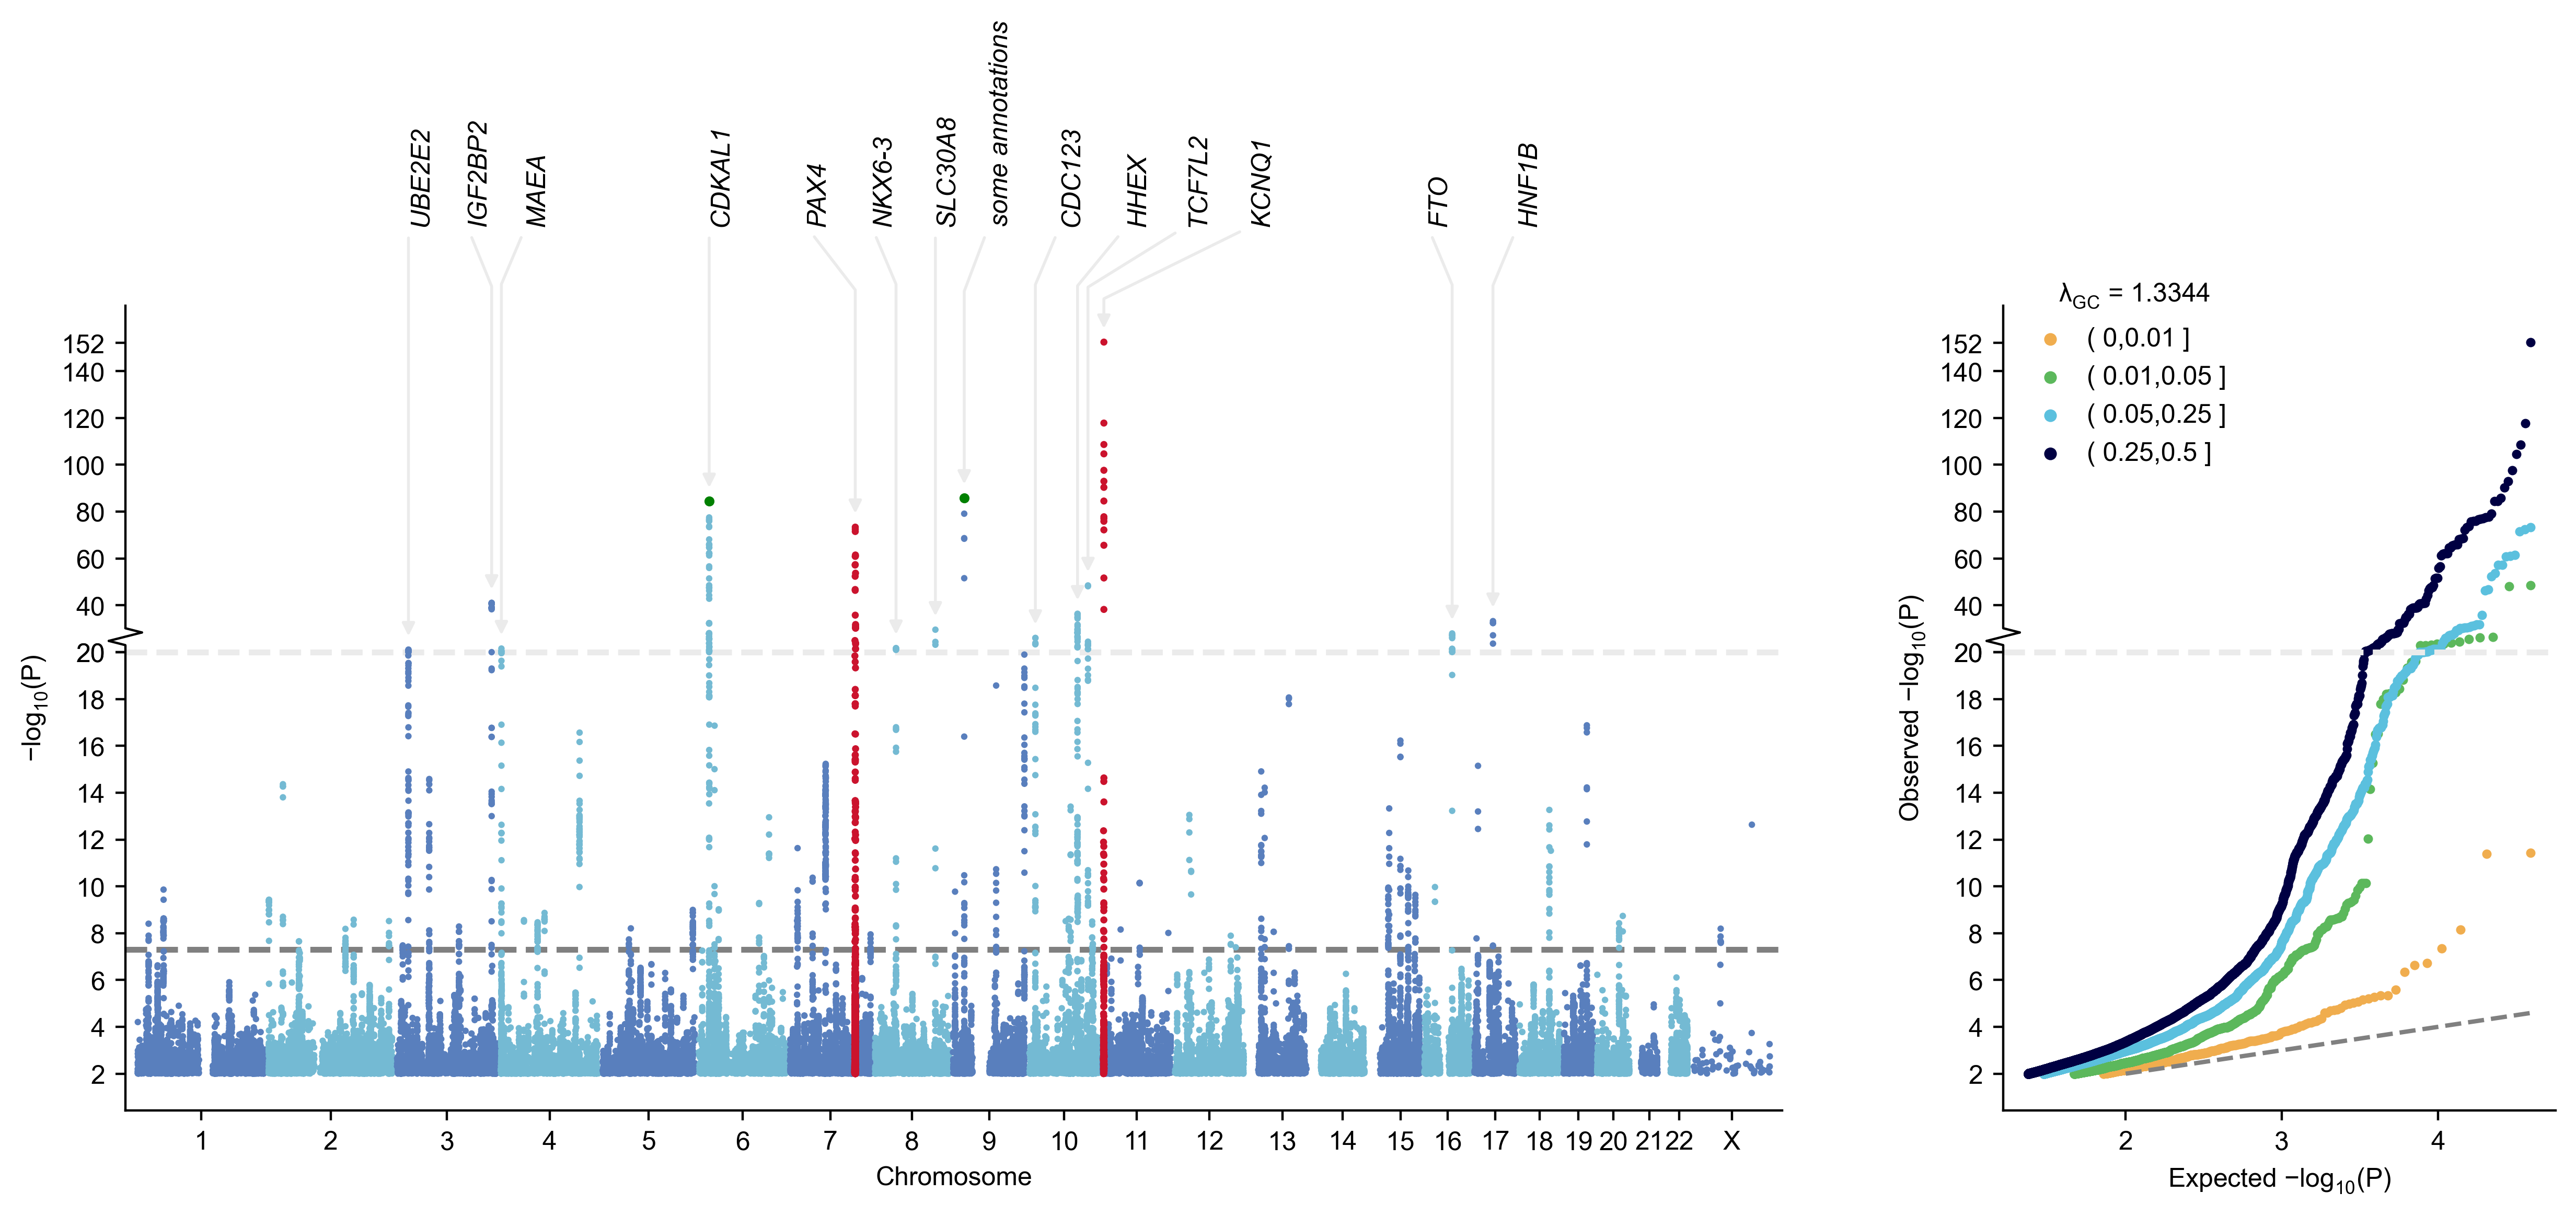

In [15]:
mysumstats.plot_mqq(mode="mqq",
                    cut=20,
                    skip=2,
                    anno="GENENAME",
                    sig_level_lead=1e-20,
                    anno_alias={"9:22134094_T_C":"some annotations"},
                    anno_style="expand",
                    xpad=0.01,
                    pinpoint=["9:22134094_T_C","6:20686996_C_A"], 
                    pinpoint_color="green",
                    highlight=["7:127253550_C_T","11:2858440_G_A"],
                    highlight_windowkb =1000,
                    stratified=True,
                    jagged=True,
                    marker_size=(5,5),
                    figargs={"figsize":(15,5),"dpi":300},
                    save="my_first_mqq_plot.png", 
                    save_args={"dpi":400,"facecolor":"white"})

For details, see: https://cloufield.github.io/gwaslab/Visualization/

## Quick regional plot without LD-information

gwaslab can also plot regional plots with or with out LD reference files.

For details, see: https://cloufield.github.io/gwaslab/RegionalPlot/

We first create a regional plot without references by specifying `mode` and `region`.

2025/10/19 20:57:13 Start to create MQQ plot...v3.6.9:
2025/10/19 20:57:13  -Genomic coordinates version: 19...
2025/10/19 20:57:13  -Genome-wide significance level to plot is set to 5e-08 ...
2025/10/19 20:57:13  -Raw input contains 1103020 variants...
2025/10/19 20:57:13  -MQQ plot layout mode is : r
2025/10/19 20:57:13  -Region to plot : chr7:126253550-128253550.
2025/10/19 20:57:13  -Extract SNPs in region : chr7:126253550-128253550...
2025/10/19 20:57:14  -Extract SNPs in specified regions: 8857
2025/10/19 20:57:14 Finished loading specified columns from the sumstats.
2025/10/19 20:57:14 Start data conversion and sanity check:
2025/10/19 20:57:14  -Removed 0 variants with nan in CHR or POS column ...
2025/10/19 20:57:14  -Removed 0 variants with CHR <=0...
2025/10/19 20:57:14  -Removed 0 variants with nan in P column ...
2025/10/19 20:57:14  -Sanity check after conversion: 0 variants with P value outside of (0,1] will be removed...
2025/10/19 20:57:14  -Sumstats P values are being

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2025/10/19 20:57:45  -plotting gene track..
2025/10/19 20:57:45  -plotting genes: 14..
2025/10/19 20:57:45  -plotting exons: 675..
2025/10/19 20:57:46  -Finished plotting gene track..
2025/10/19 20:57:46 Finished creating MQQ plot successfully!
2025/10/19 20:57:46 Start to extract variants for annotation...
2025/10/19 20:57:46  -Found 1 significant variants with a sliding window size of 500 kb...
2025/10/19 20:57:46 Finished extracting variants for annotation...
2025/10/19 20:57:46 Start to process figure arts.
2025/10/19 20:57:46  -Processing X ticks...
2025/10/19 20:57:46  -Processing X labels...
2025/10/19 20:57:46  -Processing Y labels...
2025/10/19 20:57:46  -Processing Y tick lables...
2025/10/19 20:57:46  -Processing Y labels...
2025/10/19 20:57:46  -Processing lines...
2025/10/19 20:57:46 Finished processing figure arts.
2025/10/19 20:57:46 Start to annotate variants...
2025/10/19 20:57:46  -Skip annotating
2025/10/19 20:57:46 Finished annotating variants.
2025/10/19 20:57:46 S

(<Figure size 3000x2000 with 3 Axes>, <gwaslab.g_Log.Log at 0x7fed335eb950>)

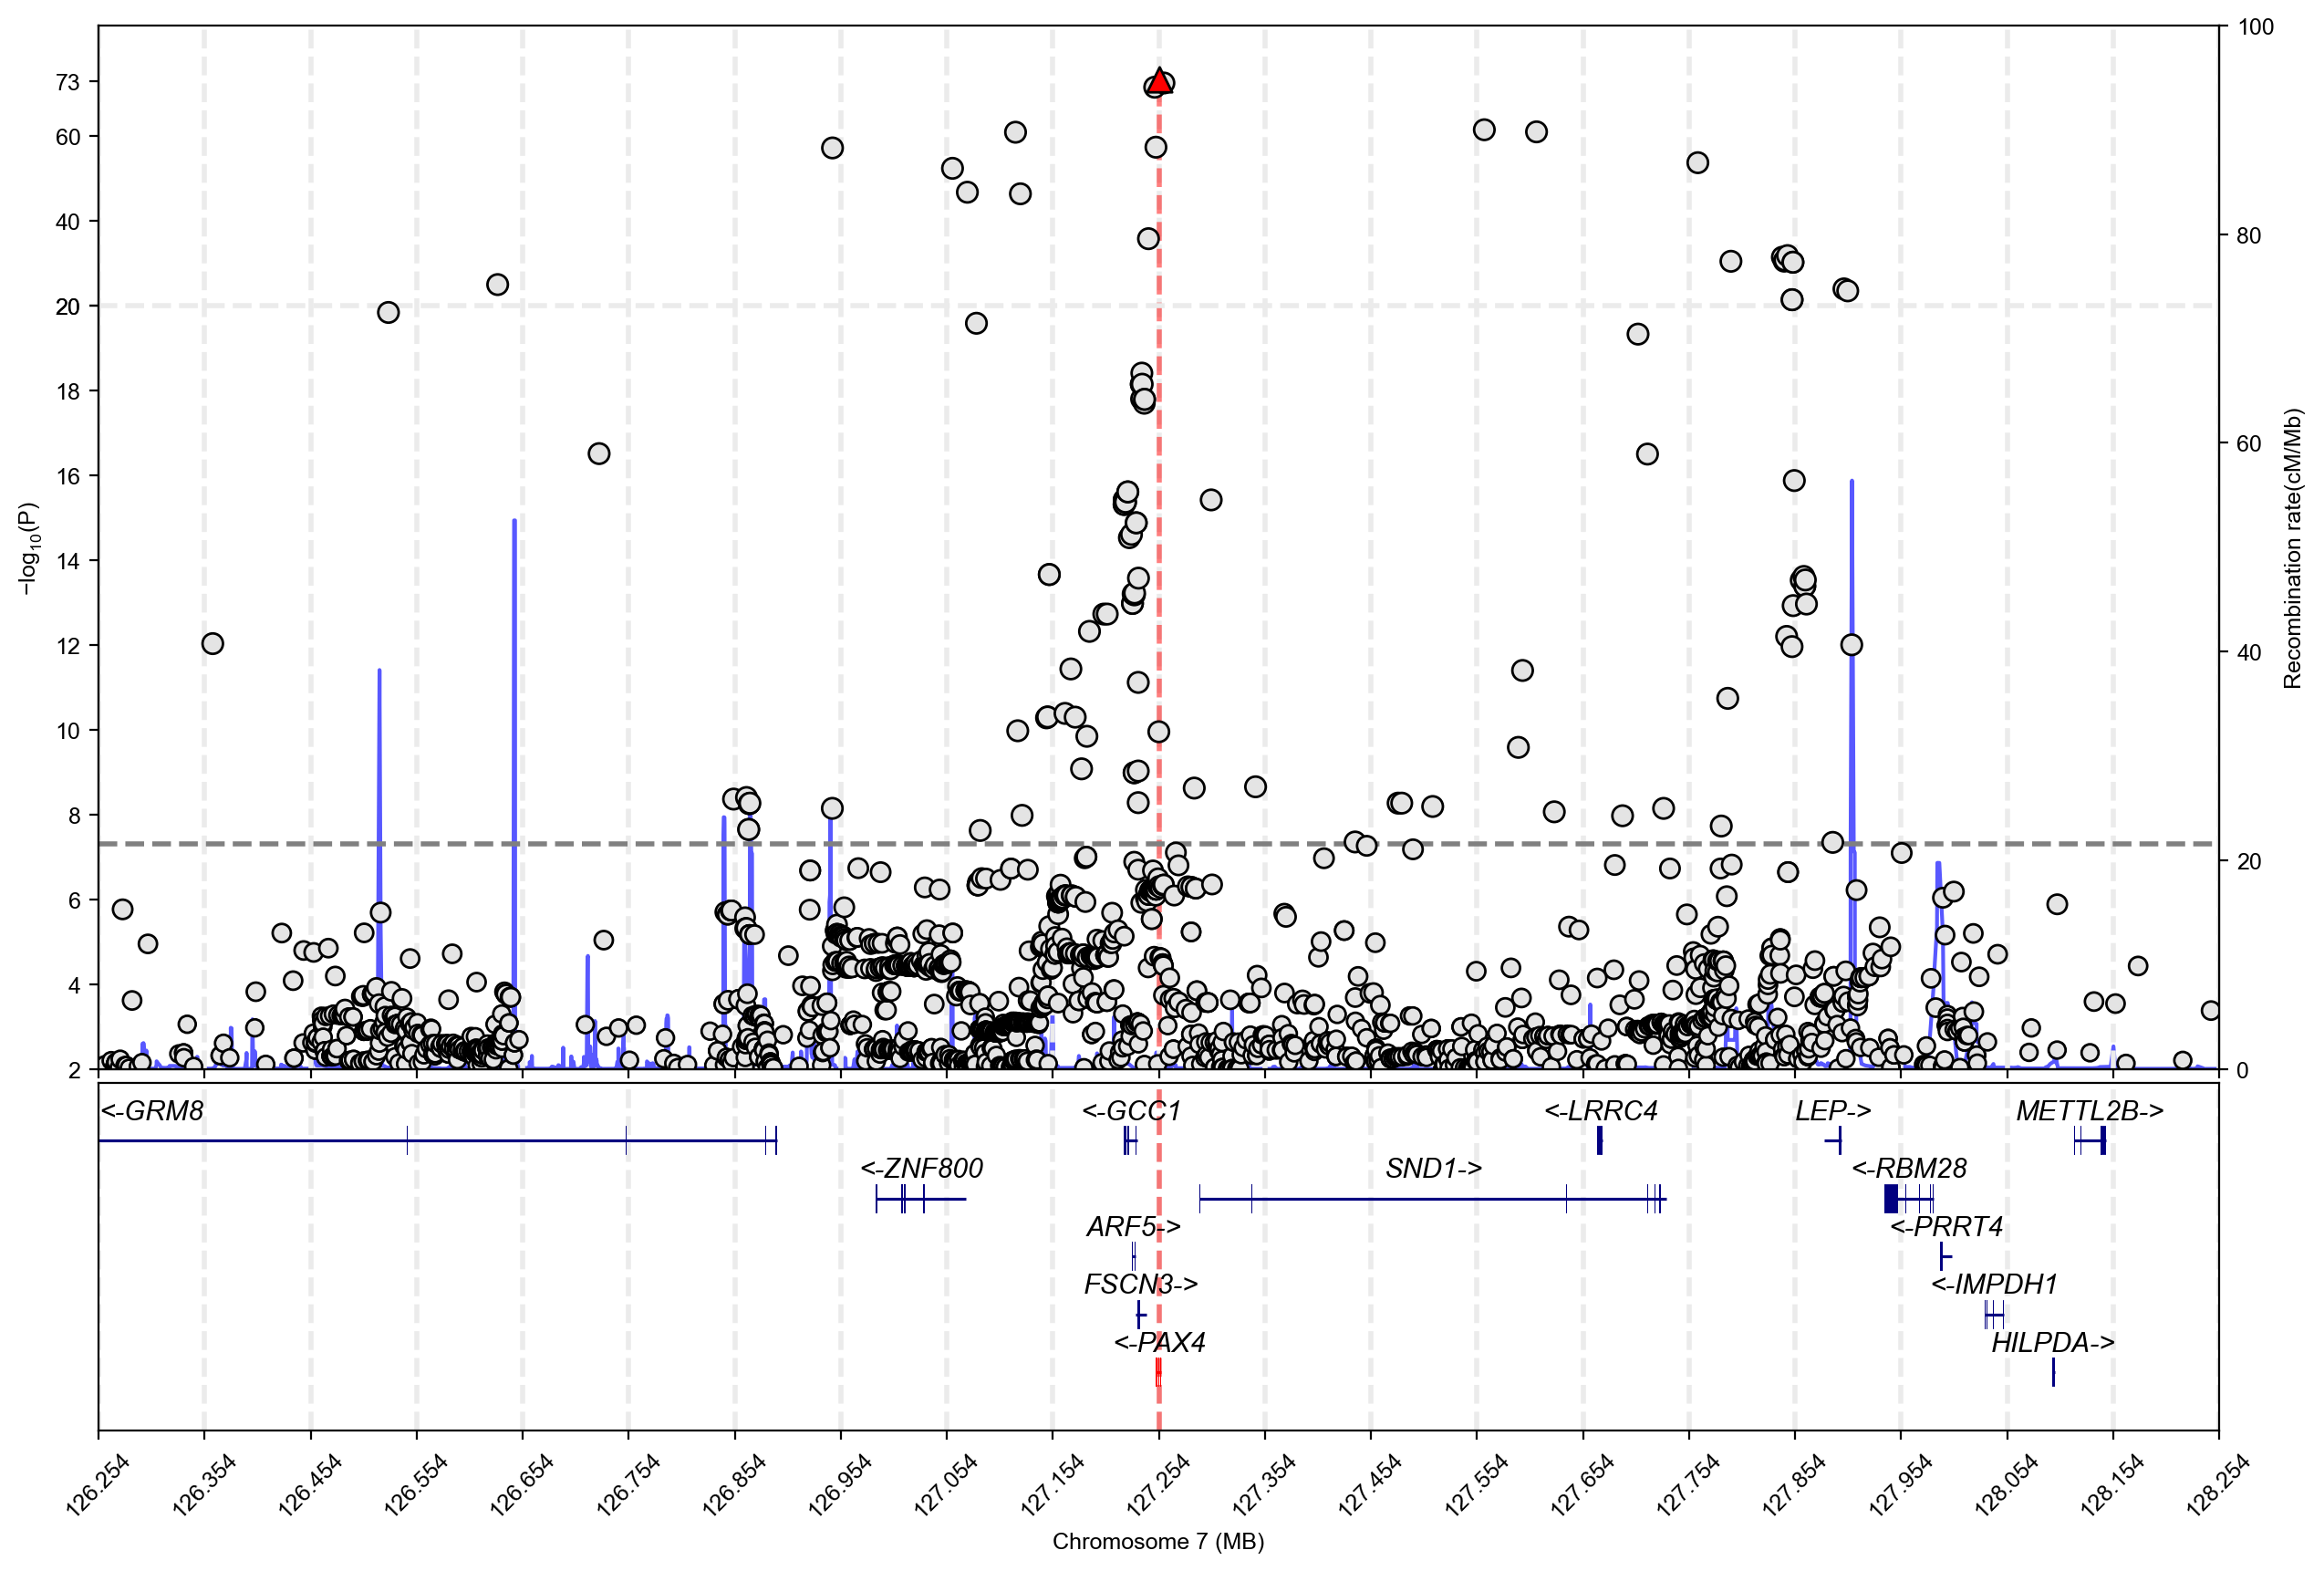

In [16]:
mysumstats.plot_mqq(mode="r",skip=2,cut=20, region=(7,126253550,128253550),region_grid=True)

## Reference file downloading

Full regional plot will require either: `user-provided vcf` or `preprocessed vcf` files by gwaslab: (e.g 1000 Genomes project, see Reference: https://cloufield.github.io/gwaslab/Reference/)

GWASLab provides pre-processed 1KG datasets for downloading.

### check available reference from gwaslab

Update the available reference list first if needed

In [17]:
# gl.update_available_ref()

In [18]:
gl.check_available_ref()

2025/10/19 20:57:47 Start to check available reference files...
2025/10/19 20:57:47  - 1kg_eas_hg19  :  https://www.dropbox.com/s/lztaxqhy2o6dpxw/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1
2025/10/19 20:57:47  - 1kg_eas_hg19_md5  :  c8c97434843c0da3113fc06879ead472
2025/10/19 20:57:47  - 1kg_eas_hg19_tbi  :  https://www.dropbox.com/s/k9klefl8m9fcfo1/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1
2025/10/19 20:57:47  - 1kg_eur_hg19  :  https://www.dropbox.com/s/1nbgqshknevseks/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1
2025/10/19 20:57:47  - 1kg_eur_hg19_md5  :  734069d895009d38c2f962bfbb6fab52
2025/10/19 20:57:47  - 1kg_eur_hg19_tbi  :  https://www.dropbox.com/s/vscvkrflh6fc5a0/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1
2025/10/19 20:57:47  - 1kg_eas_hg38  :  https://www.dropbox.com/s/3dstbbb1el9r3au/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1
2025/10/19 20:57:47  - 1kg_eas_hg38_md5  :  f45e80bca9ef7b29e6b1832e6ac15375
2025/10/19 20:57:47  - 1kg_eas_hg38_tbi  :  

{'1kg_eas_hg19': 'https://www.dropbox.com/s/lztaxqhy2o6dpxw/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1',
 '1kg_eas_hg19_md5': 'c8c97434843c0da3113fc06879ead472',
 '1kg_eas_hg19_tbi': 'https://www.dropbox.com/s/k9klefl8m9fcfo1/EAS.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1',
 '1kg_eur_hg19': 'https://www.dropbox.com/s/1nbgqshknevseks/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz?dl=1',
 '1kg_eur_hg19_md5': '734069d895009d38c2f962bfbb6fab52',
 '1kg_eur_hg19_tbi': 'https://www.dropbox.com/s/vscvkrflh6fc5a0/EUR.ALL.split_norm_af.1kgp3v5.hg19.vcf.gz.tbi?dl=1',
 '1kg_eas_hg38': 'https://www.dropbox.com/s/3dstbbb1el9r3au/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1',
 '1kg_eas_hg38_md5': 'f45e80bca9ef7b29e6b1832e6ac15375',
 '1kg_eas_hg38_tbi': 'https://www.dropbox.com/s/vwnp5vd8dcqksn4/EAS.ALL.split_norm_af.1kg_30x.hg38.vcf.gz.tbi?dl=1',
 '1kg_eur_hg38': 'https://www.dropbox.com/s/z0mkehg17lryapv/EUR.ALL.split_norm_af.1kg_30x.hg38.vcf.gz?dl=1',
 '1kg_eur_hg38_md5': '228d3285fa99132cc632

You can see the current available reference files (from the original source or pre-processed by gwaslab). 

### download reference using gwaslab

Select the keyword and use `download_ref` to download the files. The downloaded files will be placed in `~/.gwasalb` by default.
- `1kg_eas_hg19` : processed 1000 Genomes Project EAS samples dataset(hg19; ~2.8GB) It may take several minutes to download.

In [19]:
# ~2.8GB
# gl.download_ref("1kg_eas_hg19")

In [20]:
# gl.check_downloaded_ref()

After downloading, use `get_path` to obtain the file path by specifying the keyword.

In [21]:
# gl.get_path("1kg_eas_hg19")

**Note**: 
- If `tabix` is available in PATH, the speed will be  will greatly improved. Otherwise, vcf files will be loaded from the head. 
- tabix: http://www.htslib.org/download/

### Region plots with or with out LD reference files.

To create region plot with LD information, you need pass the path of reference vcf to `vcf_path`.

- For this tutorial, we just use the `1kg_eas_hg19.chr7_126253550_128253550.vcf.gz` included in the sample dataset. 
- You can also use the downloaded preprocessed file like `vcf_path = gl.get_path("1kg_eas_hg19")` or your own vcf files. )

2025/10/19 20:57:47 Start to create MQQ plot...v3.6.9:
2025/10/19 20:57:47  -Genomic coordinates version: 19...
2025/10/19 20:57:47  -Genome-wide significance level to plot is set to 5e-08 ...
2025/10/19 20:57:47  -Raw input contains 1103020 variants...
2025/10/19 20:57:47  -MQQ plot layout mode is : r
2025/10/19 20:57:47  -Region to plot : chr7:126253550-128253550.
2025/10/19 20:57:47  -Checking chromosome notations in VCF/BCF files...
2025/10/19 20:57:47  -Checking prefix for chromosomes in VCF/BCF files...
2025/10/19 20:57:47  -No prefix for chromosomes in the VCF/BCF files.
2025/10/19 20:57:47  -Extract SNPs in region : chr7:126253550-128253550...
2025/10/19 20:57:47  -Extract SNPs in specified regions: 8857
2025/10/19 20:57:47 Finished loading specified columns from the sumstats.
2025/10/19 20:57:47 Start data conversion and sanity check:
2025/10/19 20:57:47  -Removed 0 variants with nan in CHR or POS column ...
2025/10/19 20:57:47  -Removed 0 variants with CHR <=0...
2025/10/19 2

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_name', 'gene_biotype']


2025/10/19 20:58:23  -plotting gene track..
2025/10/19 20:58:23  -plotting genes: 14..
2025/10/19 20:58:23  -plotting exons: 675..
2025/10/19 20:58:23  -Finished plotting gene track..
2025/10/19 20:58:23 Finished creating MQQ plot successfully!
2025/10/19 20:58:23 Start to extract variants for annotation...
2025/10/19 20:58:23  -Found 1 significant variants with a sliding window size of 500 kb...
2025/10/19 20:58:23 Finished extracting variants for annotation...
2025/10/19 20:58:23 Start to process figure arts.
2025/10/19 20:58:23  -Processing X ticks...
2025/10/19 20:58:23  -Processing X labels...
2025/10/19 20:58:23  -Processing Y labels...
2025/10/19 20:58:23  -Processing Y tick lables...
2025/10/19 20:58:23  -Processing Y labels...
2025/10/19 20:58:23  -Processing color bar...
2025/10/19 20:58:23  -Processing lines...
2025/10/19 20:58:23 Finished processing figure arts.
2025/10/19 20:58:23 Start to annotate variants...
2025/10/19 20:58:23  -Annotating using column CHR:POS...
2025/1

(<Figure size 3000x2000 with 4 Axes>, <gwaslab.g_Log.Log at 0x7fed335eb950>)

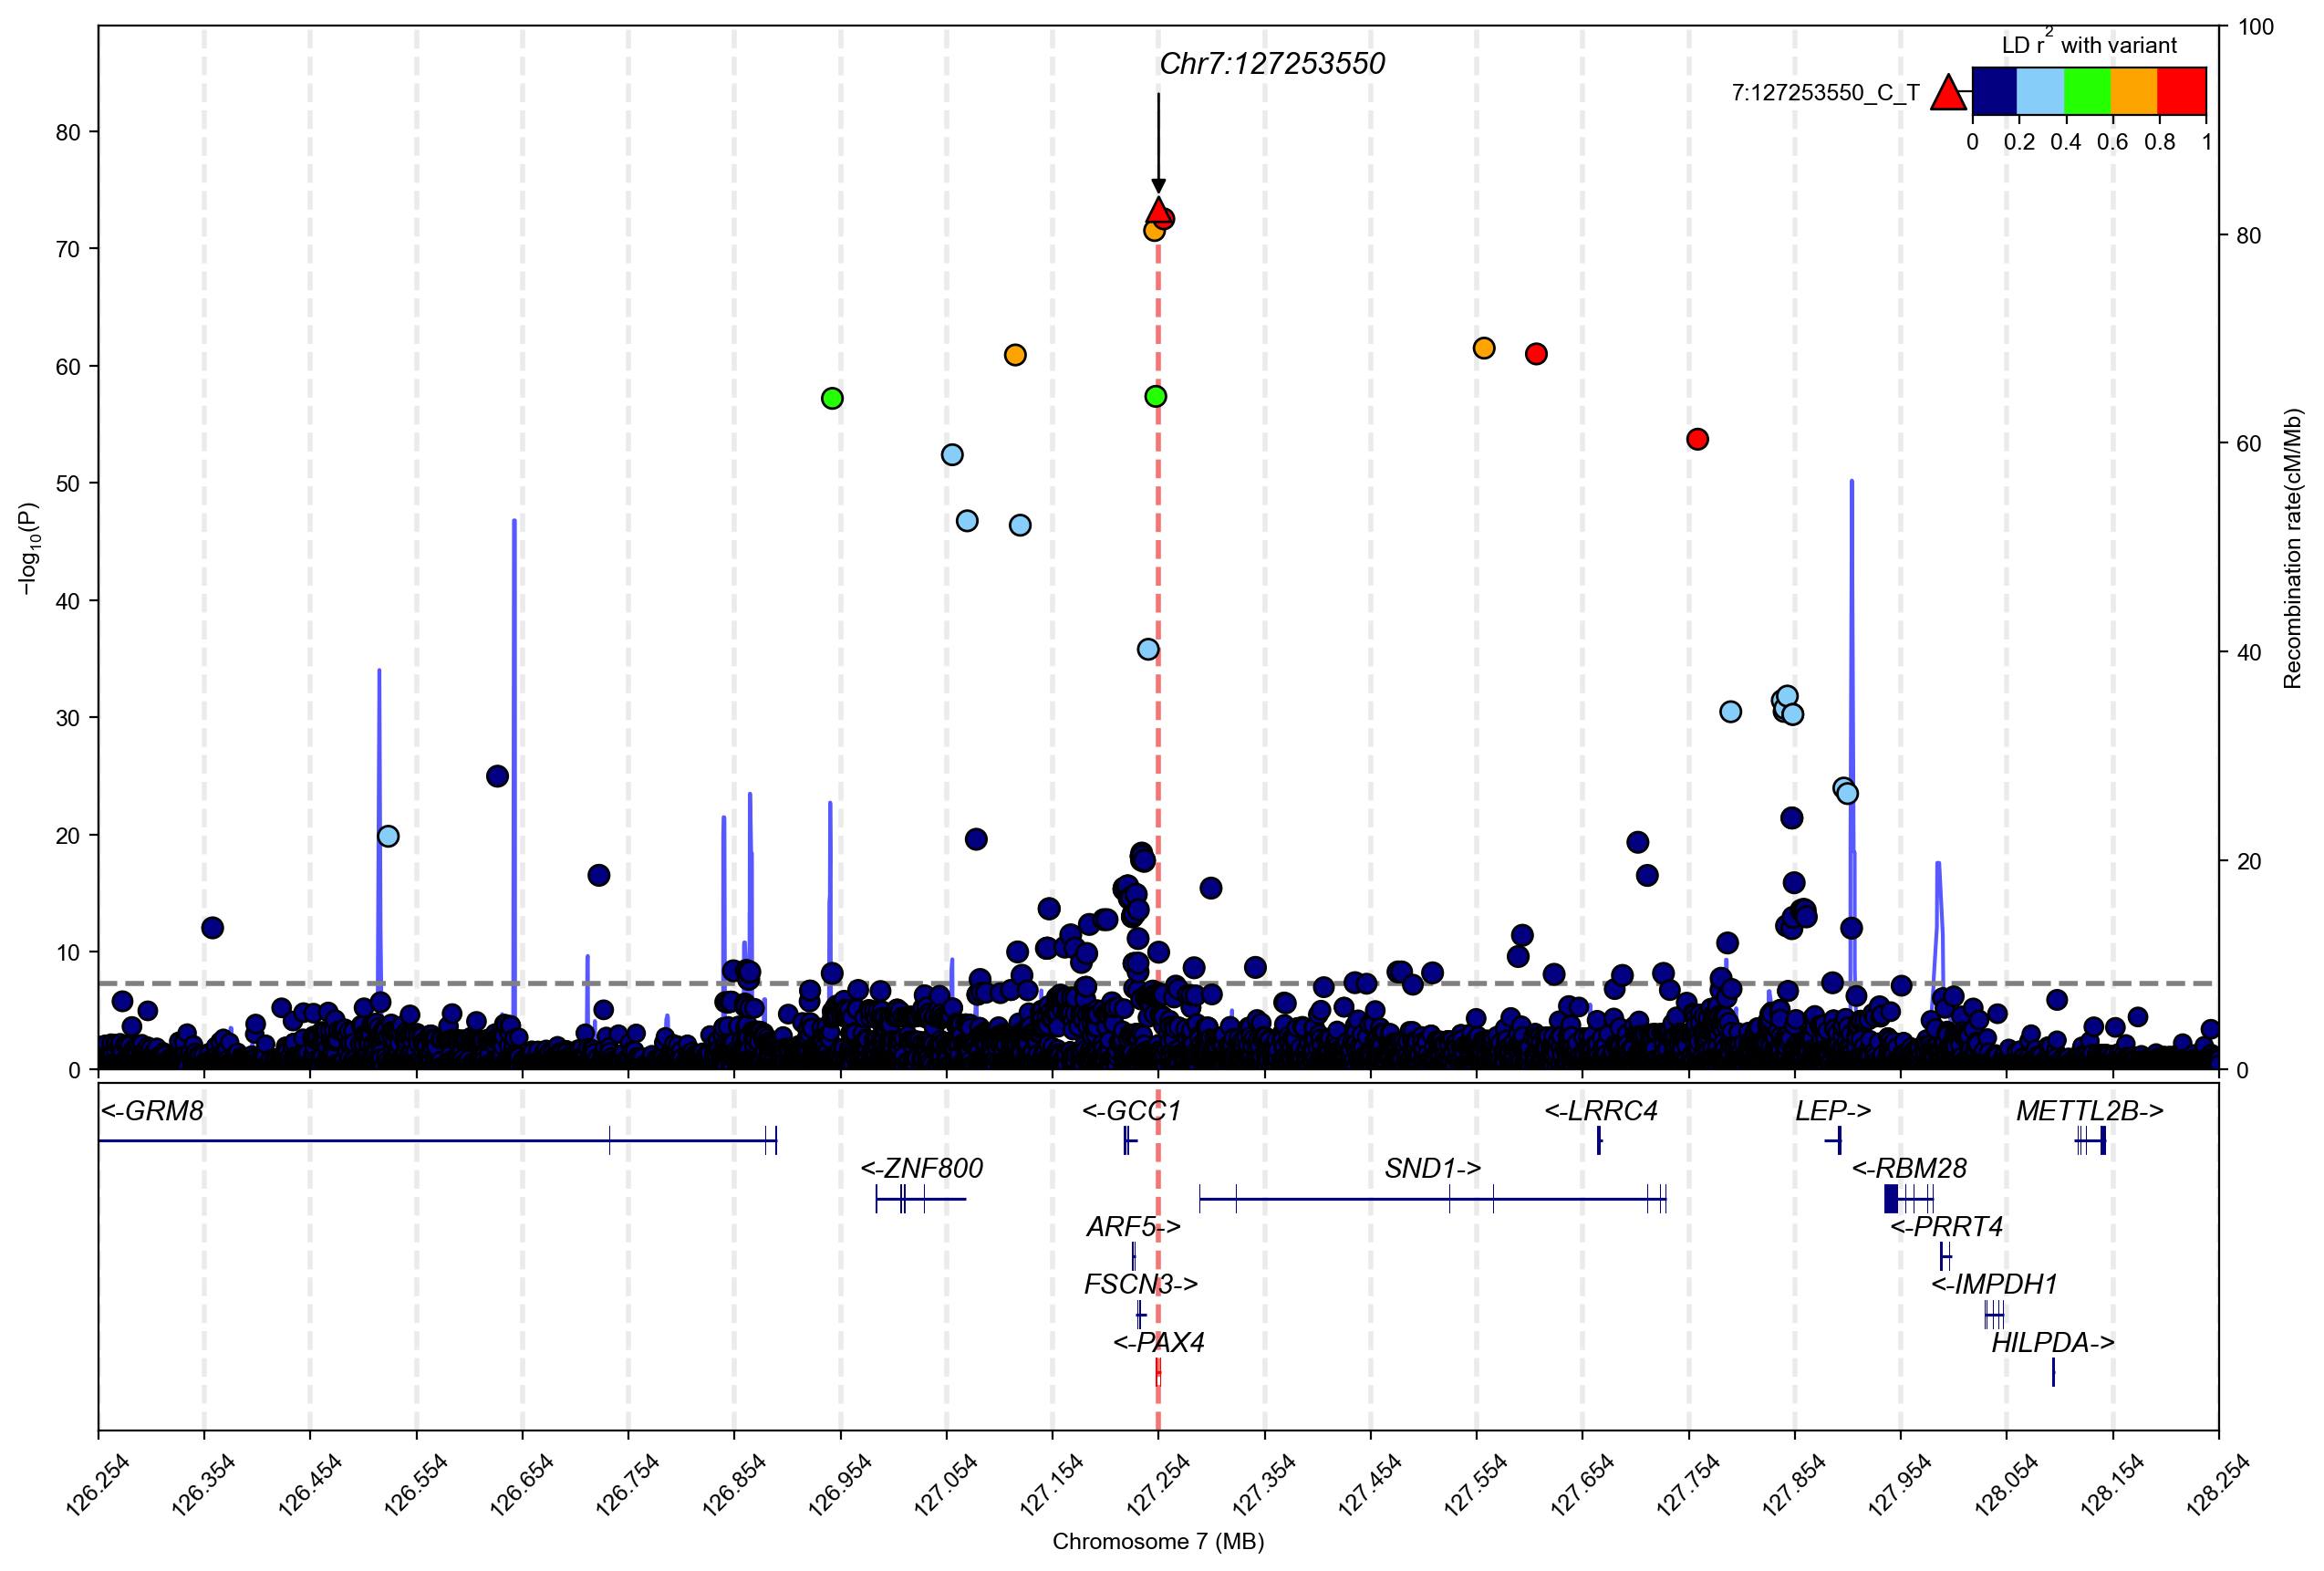

In [22]:
mysumstats.plot_mqq(mode="r",
                    region=(7,126253550,128253550),
                    region_grid=True,
                    anno=True,
                    anno_args={"rotation":0,"fontsize":12},
                    vcf_path="sample_data/1kg_eas_hg19.chr7_126253550_128253550.vcf.gz")

**Note**: 
- GWASLab default genome build version is `build="19"` (GRCh37/hg19), you can change it to `build="38"` (GRCh38/hg38) when needed. 
- For gene tracks, default is `gtf_path="ensembl"` , you can also use `gtf_path="refseq"` (NCBA RefSeq)

## Fix SNPID

You may notice that the SNPID is in `CHR:POS_REF_ALT` format. We want SNPID to be in a stadardized format `CHR:POS:REF:ALT`, we can use fix_id for this:

For other options of standardization, see: https://cloufield.github.io/gwaslab/Standardization/

In [23]:
#fixsep : fix ID separator
mysumstats.fix_id(fixsep=True)

2025/10/19 20:58:24 Start to check SNPID/rsID...v3.6.9
2025/10/19 20:58:24  -Current Dataframe shape : 1103020 x 11 ; Memory usage: 96.94 MB
2025/10/19 20:58:24  -Checking SNPID data type...
2025/10/19 20:58:24  -Checking NA strings :na,NA,Na,Nan,NaN,<NA>,null,NULL,#N/A,#VALUE!,N/A,n/a,missing,
2025/10/19 20:58:24  -Checking if SNPID contains NA strings...
2025/10/19 20:58:25  -Checking if SNPID is CHR:POS:NEA:EA...(separator: - ,: , _)
2025/10/19 20:58:26  -Replacing [_-] in SNPID with ":" ...
2025/10/19 20:58:27 Finished checking SNPID/rsID.


In [24]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
0,1:752566:G:A,1,752566,G,A,0.8422,-0.0155,0.0131,0.2350,166718,1960099
1,1:752721:A:G,1,752721,G,A,0.2507,0.0204,0.0147,0.1650,166718,1960099
2,1:754182:A:G,1,754182,G,A,0.2505,0.0222,0.0166,0.1817,166718,1960099
3,1:760912:C:T,1,760912,C,T,0.8425,-0.0171,0.0148,0.2480,166718,1960099
4,1:761147:T:C,1,761147,C,T,0.1581,0.0171,0.0148,0.2480,166718,1960099
...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911:A:G,23,154343911,G,A,0.8058,0.0019,0.0090,0.8297,191764,1960099
1103016,X:154379088:C:A,23,154379088,C,A,0.7783,0.0027,0.0094,0.7723,191764,1960099
1103017,X:154536836:C:T,23,154536836,C,T,0.2196,-0.0084,0.0085,0.3192,191764,1960099
1103018,X:154763036:A:G,23,154763036,G,A,0.3686,-0.0102,0.0105,0.3302,191764,1960099


## Annotate rsID

rsID is assigned using two types of reference file:
- ref_rsid_tsv : tsv file for annotation of commonly used variants
- ref_rsid_vcf : vcf file for annotation of other variants

GWASLab provides preprocessed tsv files for 1KG varaints (~80M), we can download the file using `.download_ref` with key words. This time we will use `1kg_dbsnp151_hg19_auto`, which is the SNPID-rsID conversion table for autosomal variants in 1KG project (hg19). This will take around a few minutes to dowadload.

In [25]:
# 961M
# gl.download_ref("1kg_dbsnp151_hg19_auto")

For now, we just use the "1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz" included in the sample dataset.

In [26]:
mysumstats.assign_rsid(ref_rsid_tsv= "sample_data/1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz")

2025/10/19 20:58:27 Start to assign rsID by matching SNPID with CHR:POS:REF:ALT in the reference TSV...v3.6.9
2025/10/19 20:58:27  -Current Dataframe shape : 1103020 x 11 ; Memory usage: 96.94 MB
2025/10/19 20:58:27  -Number of threads/cores to use: 1
2025/10/19 20:58:27  -Reference TSV: sample_data/1kg_dbsnp151_hg19_auto_hm3_chr7_variants.txt.gz
2025/10/19 20:58:27  -1103020 rsID could be possibly fixed...
2025/10/19 20:58:27  -Setting block size:  5000000
2025/10/19 20:58:27  -Loading block: 0   
2025/10/19 20:58:30  -rsID annotation for 2564 needed to be fixed!
2025/10/19 20:58:30  -Annotated 1100456 rsID successfully!
2025/10/19 20:58:30 Finished assign rsID using reference file.


In [27]:
mysumstats.data

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS,rsID
0,1:752566:G:A,1,752566,G,A,0.8422,-0.0155,0.0131,0.2350,166718,1960099,rs3094315
1,1:752721:A:G,1,752721,G,A,0.2507,0.0204,0.0147,0.1650,166718,1960099,rs3131972
2,1:754182:A:G,1,754182,G,A,0.2505,0.0222,0.0166,0.1817,166718,1960099,rs3131969
3,1:760912:C:T,1,760912,C,T,0.8425,-0.0171,0.0148,0.2480,166718,1960099,rs1048488
4,1:761147:T:C,1,761147,C,T,0.1581,0.0171,0.0148,0.2480,166718,1960099,rs3115850
...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911:A:G,23,154343911,G,A,0.8058,0.0019,0.0090,0.8297,191764,1960099,<NA>
1103016,X:154379088:C:A,23,154379088,C,A,0.7783,0.0027,0.0094,0.7723,191764,1960099,<NA>
1103017,X:154536836:C:T,23,154536836,C,T,0.2196,-0.0084,0.0085,0.3192,191764,1960099,<NA>
1103018,X:154763036:A:G,23,154763036,G,A,0.3686,-0.0102,0.0105,0.3302,191764,1960099,<NA>


- We annotated 1100456   (1100456   /1103020  = 99.7%) variants using the conversion table.
- For the annotation of other variants (0.3%), we may need the dbSNP reference vcf.

### Maximize the annotation

For the annotation of not-so-common variants, we can use vcf files downloaded form NCBI dbsnp (https://ftp.ncbi.nih.gov/snp/latest_release/VCF/). 

Note:
- The file size is huge (>20GB) and it might take several hours to download. (we can skip this step in this tutorial. )
- Specify `chr_dict` to match the chromosome notations in sumstats and in vcf files.

Parameters : 
- `ref_rsid_vcf`: the path to the reference rsID vcf file
- `n_cores` : number of threads to use

For this tutorial, we use `b157_2564.vcf.gz` in the sample dataset, which is extracted from the b157 version of dbSNP VCF.

In [28]:
mysumstats.assign_rsid(n_cores=1,
                       ref_rsid_vcf= "sample_data/b157_2564.vcf.gz",
                       chr_dict = gl.get_number_to_NC(build="19") )

2025/10/19 20:58:30 Start to assign rsID using reference VCF...v3.6.9
2025/10/19 20:58:30  -Current Dataframe shape : 1103020 x 12 ; Memory usage: 105.35 MB
2025/10/19 20:58:30  -Number of threads/cores to use: 1
2025/10/19 20:58:30  -Reference VCF: sample_data/b157_2564.vcf.gz
2025/10/19 20:58:30  -Assigning rsID based on CHR:POS and REF:ALT/ALT:REF...
2025/10/19 20:58:32  -rsID Annotation for 98 need to be fixed!
2025/10/19 20:58:32  -Annotated 2466 rsID successfully!
2025/10/19 20:58:32 Finished assign rsID using reference file.


After this, only 98 variants were not annotated, mostly indels that are not available in the reference VCF.

In [29]:
mysumstats.data.loc[mysumstats.data["rsID"].isna(),:]

,SNPID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS,rsID
514556,7:126557427:CCACACACACA:C,7,126557427,C,CCACACACACA,0.9952,-0.0497,0.0724,0.49210,191764,1960399,<NA>
518422,7:127424966:C:CTTGTTTTGTTTTGTTTTGTTTTG,7,127424966,C,CTTGTTTTGTTTTGTTTTGTTTTG,0.0034,-0.1844,0.1342,0.16940,191764,1960399,<NA>
519593,7:127765815:A:AAAATAAATAAATAAATAAAT,7,127765815,AAAATAAATAAATAAATAAAT,A,0.9442,-0.0262,0.0239,0.27350,191764,1960399,<NA>
519882,7:127825806:T:TACACAC,7,127825806,TACACAC,T,0.9640,0.0721,0.0283,0.01093,191764,1960399,<NA>
519883,7:127825806:T:TACAC,7,127825806,TACAC,T,0.8700,0.0232,0.0143,0.10540,191764,1960399,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...
1102883,X:145493373:TAA:T,23,145493373,TAA,T,0.1006,0.0098,0.0120,0.41410,191764,1960399,<NA>
1102893,X:145943926:TA:T,23,145943926,TA,T,0.5974,-0.0076,0.0118,0.52130,191764,1960399,<NA>
1102959,X:151172462:CGT:C,23,151172462,C,CGT,0.7959,0.0066,0.0138,0.63190,191764,1960399,<NA>
1102972,X:152032452:A:AT,23,152032452,AT,A,0.9633,0.0111,0.0239,0.64110,191764,1960399,<NA>


## Harmonization

gwaslab can harmonize the sumstats based on reference files.

- ref_seq : reference genome fasta file for allele alignment
- ref_infer : vcf file with allele frequency information for inferring strand and comparing allele frequency 
- ref_alt_freq : field in INFO of vcf file for alternative allele frequency

For details see: https://cloufield.github.io/gwaslab/Harmonization/

For reference data, see: https://cloufield.github.io/gwaslab/Reference/

We can use the refernce genome from 1000 genomes. 

http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/human_g1k_v37.fasta.gz
http://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/human_g1k_v37.fasta.fai

When calling `.harmonize()`, `.basic_check()` will be called first to make sure the dataset is ready for harmonization. Since we have already performed basic_check, we set `basic_check=False` here. For `ref_infer`, we pass the downloaded vcf files for 1KG EAS and specify the field for alternative allele frequency to AF by `ref_alt_freq= "AF"`.  

In [30]:
mysumstats.harmonize(basic_check=False,
                     n_cores=3,
                     ref_seq     =  "/home/yunye/.gwaslab/hg19.fa",
                     ref_infer   =  gl.get_path("1kg_eas_hg19"),
                     ref_alt_freq= "AF")

2025/10/19 20:58:32 Start to check if NEA is aligned with reference sequence...v3.6.9
2025/10/19 20:58:32  -Current Dataframe shape : 1103020 x 12 ; Memory usage: 105.35 MB
2025/10/19 20:58:32  -Reference genome FASTA file: /home/yunye/.gwaslab/hg19.fa
2025/10/19 20:58:32  -Loading fasta records:1  2  3  4  5  6  7  X  8  9  10  11  12  13  14  15  16  17  18  20  19  22  21  
2025/10/19 20:58:49  -Checking records
2025/10/19 20:58:49    -Building numpy fasta records from dict
2025/10/19 20:59:02    -Checking records for ( len(NEA) <= 4 and len(EA) <= 4 )
2025/10/19 20:59:04    -Checking records for ( len(NEA) > 4 or len(EA) > 4 )
2025/10/19 20:59:05  -Finished checking records
2025/10/19 20:59:07  -Variants allele on given reference sequence :  530823
2025/10/19 20:59:07  -Variants flipped :  571268
2025/10/19 20:59:07   -Raw Matching rate :  99.92%
2025/10/19 20:59:07  -Variants inferred reverse_complement :  0
2025/10/19 20:59:07  -Variants inferred reverse_complement_flipped :  0
2

In [31]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
0,1:752566:G:A,rs3094315,1,752566,A,G,0.1578,0.0155,0.0131,0.2350,166718,1960010
1,1:752721:A:G,rs3131972,1,752721,G,A,0.2507,0.0204,0.0147,0.1650,166718,1960000
2,1:754182:A:G,rs3131969,1,754182,G,A,0.2505,0.0222,0.0166,0.1817,166718,1960000
3,1:760912:C:T,rs1048488,1,760912,T,C,0.1575,0.0171,0.0148,0.2480,166718,1960010
4,1:761147:T:C,rs3115850,1,761147,C,T,0.1581,0.0171,0.0148,0.2480,166718,1960000
...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911:A:G,rs4898358,23,154343911,G,A,0.8058,0.0019,0.0090,0.8297,191764,1960000
1103016,X:154379088:C:A,rs5987090,23,154379088,A,C,0.2217,-0.0027,0.0094,0.7723,191764,1960010
1103017,X:154536836:C:T,rs12013168,23,154536836,T,C,0.7804,0.0084,0.0085,0.3192,191764,1960010
1103018,X:154763036:A:G,rs5940466,23,154763036,G,A,0.3686,-0.0102,0.0105,0.3302,191764,1960000


Check the data again. Looks good!

## Sumstats Summary

Check the summary of the currrent sumstats (see: https://cloufield.github.io/gwaslab/StatusCode/):

In [32]:
mysumstats.summary()

Values  \
Category Items                                                                 
META     Row_num                                                     1103020   
         Column_num                                                       12   
         Column_names       SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS   
         Last_checked_time                          Sun Oct 19 20:59:23 2025   
MISSING  Missing_total                                                    98   
         Missing_rsID                                                     98   
MAF      Common                                                       954139   
         Low_frequency                                                105565   
         Rare                                                          43245   
P        Minimum                                                   4.05e-153   
         Significant                                                    1271   
         Suggestive                                                     2532   
STATUS   1960010                                                      570540   
         1960000                                                      530035   
         1960368                                                         871   
         1960002                                                         520   
         1960012                                                         494   
         1960018                                                         164   
         1960008                                                         156   
         1960309                                                          63   
         1960007                                                          49   
         1960017                                                          48   
         1960364                                                          31   
         1960363                                                          27   
         1960319                                                          22   

                            Percentage  
Category Items                          
META     Row_num                  <NA>  
         Column_num               <NA>  
         Column_names             <NA>  
         Last_checked_time        <NA>  
MISSING  Missing_total            0.01  
         Missing_rsID             0.01  
MAF      Common                   86.5  
         Low_frequency            9.57  
         Rare                     3.92  
P        Minimum                   0.0  
         Significant              0.12  
         Suggestive               0.23  
STATUS   1960010                 51.73  
         1960000                 48.05  
         1960368                  0.08  
         1960002                  0.05  
         1960012                  0.04  
         1960018                  0.01  
         1960008                  0.01  
         1960309                  0.01  
         1960007                   0.0  
         1960017                   0.0  
         1960364                   0.0  
         1960363                   0.0  
         1960319                   0.0

Check the details of harmonization results `.lookup_status()`

In [33]:
mysumstats.lookup_status()

,Genome_Build,rsID&SNPID,CHR&POS,Stadardize&Normalize,Align,Panlidromic_SNP&Indel,Count,Percentage(%)
1960000,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Not_palindromic_SNPs,530035,48.05
1960002,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Palindromic-strand_fixed,520,0.05
1960007,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,Indistinguishable,49,0.0
1960008,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Match: NEA=REF,No_matching_or_no_info,156,0.01
1960010,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Not_palindromic_SNPs,570540,51.73
1960012,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Palindromic-strand_fixed,494,0.04
1960017,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,Indistinguishable,48,0.0
1960018,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized SNP,Flipped_fixed,No_matching_or_no_info,164,0.01
1960309,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized & normalized indel,Match: NEA=REF,Unchecked,63,0.01
1960319,hg19,rsid unknown & SNPID valid,CHR valid & POS valid,standardized & normalized indel,Flipped_fixed,Unchecked,22,0.0


## Formatting and saving : to_format()

You can easily format the processed sumstats and save it. For details, see: https://cloufield.github.io/gwaslab/Format/

Let's export the sumstats as the default format used in LDSC. 

In [34]:
mysumstats.to_format("clean_sumstats",fmt="ldsc")

2025/10/19 20:59:25 Start to convert the output sumstats in:  ldsc  format
2025/10/19 20:59:25  -Formatting statistics ...
2025/10/19 20:59:27  -Float statistics formats:
2025/10/19 20:59:27   - Columns       : ['EAF', 'BETA', 'SE', 'P']
2025/10/19 20:59:27   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
2025/10/19 20:59:27  -Start outputting sumstats in ldsc format...
2025/10/19 20:59:27  -ldsc format will be loaded...
2025/10/19 20:59:27  -ldsc format meta info:
2025/10/19 20:59:27   - format_name  : ldsc
2025/10/19 20:59:27   - format_source  : https://github.com/bulik/ldsc/wiki/Summary-Statistics-File-Format
2025/10/19 20:59:27   - format_source2  : https://github.com/bulik/ldsc/blob/master/munge_sumstats.py
2025/10/19 20:59:27   - format_version  :  20150306
2025/10/19 20:59:27  -gwaslab to ldsc format dictionary:
2025/10/19 20:59:27   - gwaslab keys: rsID,NEA,EA,EAF,N,BETA,P,Z,INFO,OR,CHR,POS
2025/10/19 20:59:27   - ldsc values: SNP,A2,A1,Frq,N,Beta,P,Z,INFO,OR,CHR,P

Sometimes we only need to export part of the sumstats. For example, 
- we can specify `hapmap3=True` to export only hapmap3 variants; 
- specify `exclude_hla=True` to exclude variants in HLA region when exporting; 
- specify `md5sum=True` to calculate the md5sum value for the exported sumstats.

In [35]:
mysumstats.to_format("clean_sumstats",fmt="ldsc",hapmap3=True,exclude_hla=True,md5sum=True)

2025/10/19 20:59:29 Start to convert the output sumstats in:  ldsc  format
2025/10/19 20:59:29  -Excluded 2757 variants in HLA region (chr6: 25000000-34000000 )...
2025/10/19 20:59:29 Start to extract HapMap3 SNPs...v3.6.9
2025/10/19 20:59:29  -Current Dataframe shape : 1100263 x 12 ; Memory usage: 113.54 MB
2025/10/19 20:59:29  -Loading Hapmap3 variants from built-in datasets...
2025/10/19 20:59:31  -rsID will be used for matching...
2025/10/19 20:59:33  -Raw input contains 1090439 Hapmap3 variants based on rsID...
2025/10/19 20:59:33  -Checking if alleles are same...
2025/10/19 20:59:33  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/10/19 20:59:33  -Extract 1090439 variants in Hapmap3 datasets for build 19.
2025/10/19 20:59:33  -Formatting statistics ...
2025/10/19 20:59:35  -Float statistics formats:
2025/10/19 20:59:35   - Columns       : ['EAF', 'BETA', 'SE', 'P']
2025/10/19 20:59:35   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
2025/10/19 20:59:35  -

Output in GWAS-SSF format

In [36]:
mysumstats.to_format("clean_sumstats",fmt="ssf",ssfmeta=True, md5sum=True)

2025/10/19 20:59:37 Start to convert the output sumstats in:  ssf  format
2025/10/19 20:59:37  -Formatting statistics ...
2025/10/19 20:59:39  -Float statistics formats:
2025/10/19 20:59:39   - Columns       : ['EAF', 'BETA', 'SE', 'P']
2025/10/19 20:59:39   - Output formats: ['{:.4g}', '{:.4f}', '{:.4f}', '{:.4e}']
2025/10/19 20:59:39  -Replacing SNPID separator from ":" to "_"...
2025/10/19 20:59:39  -Start outputting sumstats in ssf format...
2025/10/19 20:59:39  -ssf format will be loaded...
2025/10/19 20:59:39  -ssf format meta info:
2025/10/19 20:59:39   - format_name  : ssf
2025/10/19 20:59:39   - format_source  : https://www.biorxiv.org/content/10.1101/2022.07.15.500230v1.full
2025/10/19 20:59:39   - format_cite_name  : GWAS-SSF v0.1
2025/10/19 20:59:39   - format_separator  : \t
2025/10/19 20:59:39   - format_na  : #NA
2025/10/19 20:59:39   - format_col_order  : chromosome,base_pair_location,effect_allele,other_allele,beta,odds_ratio,hazard_ratio,standard_error,effect_allele_f

## Liftover

gwaslab can perform liftover for base pair positions.

**Note**: GWASLab only liftover CHR and POS, and when lifted, the last two digits status code will be rolled back to 99. Since for different reference genome, the reference allele or strand might be reverse, so it is needed to harmonize again after liftover.



In [37]:
mysumstats.liftover(n_cores=3, from_build="19", to_build="38")

2025/10/19 20:59:42 Start to perform liftover...v3.6.9
2025/10/19 20:59:42  -Current Dataframe shape : 1103020 x 12 ; Memory usage: 105.35 MB
2025/10/19 20:59:42  -Number of threads/cores to use: 3
2025/10/19 20:59:42 No records in config file. Please download first.
2025/10/19 20:59:42 Start to download  19to38  ...
2025/10/19 20:59:42  -Downloading to: /home/yunye/.gwaslab/hg19ToHg38.over.chain.gz
2025/10/19 20:59:42  -File /home/yunye/.gwaslab/hg19ToHg38.over.chain.gz exists.
2025/10/19 20:59:42  -Updating record in config file...
2025/10/19 20:59:42 Downloaded  19to38  successfully!
2025/10/19 20:59:42  -Creating converter using provided ChainFile: /home/yunye/.gwaslab/hg19ToHg38.over.chain.gz
2025/10/19 20:59:42  -Creating converter : 19 -> 38
2025/10/19 20:59:43  -Converting variants with status code xxx0xxx :1103020...
2025/10/19 21:00:52  -Removed unmapped variants: 174
2025/10/19 21:00:52 Start to fix chromosome notation (CHR)...v3.6.9
2025/10/19 21:00:52  -Current Dataframe s

In [38]:
mysumstats.data

,SNPID,rsID,CHR,POS,EA,NEA,EAF,BETA,SE,P,N,STATUS
0,1:752566:G:A,rs3094315,1,817186,A,G,0.1578,0.0155,0.0131,0.2350,166718,3860099
1,1:752721:A:G,rs3131972,1,817341,G,A,0.2507,0.0204,0.0147,0.1650,166718,3860099
2,1:754182:A:G,rs3131969,1,818802,G,A,0.2505,0.0222,0.0166,0.1817,166718,3860099
3,1:760912:C:T,rs1048488,1,825532,T,C,0.1575,0.0171,0.0148,0.2480,166718,3860099
4,1:761147:T:C,rs3115850,1,825767,C,T,0.1581,0.0171,0.0148,0.2480,166718,3860099
...,...,...,...,...,...,...,...,...,...,...,...,...
1103015,X:154343911:A:G,rs4898358,23,155115636,G,A,0.8058,0.0019,0.0090,0.8297,191764,3860099
1103016,X:154379088:C:A,rs5987090,23,155150813,A,C,0.2217,-0.0027,0.0094,0.7723,191764,3860099
1103017,X:154536836:C:T,rs12013168,23,155307523,T,C,0.7804,0.0084,0.0085,0.3192,191764,3860099
1103018,X:154763036:A:G,rs5940466,23,155533375,G,A,0.3686,-0.0102,0.0105,0.3302,191764,3860099


For details, see https://cloufield.github.io/gwaslab/LiftOver/

## LDSC

Reload the sample data and run LDSC in GWASLab

In [39]:
mysumstats = gl.Sumstats("./sample_data/bbj_t2d_hm3_chr7_variants.txt.gz", fmt="gwaslab", build="19", verbose=False)

In [40]:
mysumstats.filter_hapmap3(inplace=True)

2025/10/19 21:00:58 Start to extract HapMap3 SNPs...v3.6.9
2025/10/19 21:00:58  -Current Dataframe shape : 1103020 x 13 ; Memory usage: 113.76 MB
2025/10/19 21:00:58  -Loading Hapmap3 variants from built-in datasets...
2025/10/19 21:00:59  -rsID will be used for matching...
2025/10/19 21:01:01  -Raw input contains 1092430 Hapmap3 variants based on rsID...
2025/10/19 21:01:01  -Checking if alleles are same...
2025/10/19 21:01:02  -Filtered 0 Hapmap3 variants due to unmatech alleles...


In [41]:
# pass your ld score files downloads from LDSC
# https://github.com/bulik/ldsc

mysumstats.estimate_h2_by_ldsc(ref_ld_chr = "~/tools/ldsc/ldscores/eas_ldscores/", 
                                 w_ld_chr = "~/tools/ldsc/ldscores/eas_ldscores/")

2025/10/19 21:01:02 Start to extract HapMap3 SNPs...v3.6.9
2025/10/19 21:01:02  -Current Dataframe shape : 1092430 x 13 ; Memory usage: 121.21 MB
2025/10/19 21:01:02  -Loading Hapmap3 variants from built-in datasets...
2025/10/19 21:01:03  -rsID will be used for matching...
2025/10/19 21:01:05  -Raw input contains 1213752 Hapmap3 variants based on rsID...
2025/10/19 21:01:05  -Checking if alleles are same...
2025/10/19 21:01:06  -Filtered 0 Hapmap3 variants due to unmatech alleles...
2025/10/19 21:01:06 Start to run LD score regression...v3.6.9
2025/10/19 21:01:06  -Current Dataframe shape : 1213752 x 13 ; Memory usage: 132.21 MB
2025/10/19 21:01:06  -Run single variate LD score regression:
2025/10/19 21:01:06   -Adopted from LDSC source code: https://github.com/bulik/ldsc
2025/10/19 21:01:06   -Please cite LDSC: Bulik-Sullivan, et al. LD Score Regression Distinguishes Confounding from Polygenicity in Genome-Wide Association Studies. Nature Genetics, 2015.
2025/10/19 21:01:06  -Argumen

In [42]:
mysumstats.ldsc_h2

,h2_obs,h2_se,Lambda_gc,Mean_chi2,Intercept,Intercept_se,Ratio,Ratio_se,Catagories
0,0.10394433,0.00650644,1.32982693,1.49125406,1.09147712,0.01056279,0.18621142,0.02150169,NA


For details, see https://cloufield.github.io/gwaslab/LDSCinGWASLab/